In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import pylab as plt
import math
%matplotlib inline

In [2]:
City = pd.read_csv('111.csv', encoding='latin-1')

City.drop_duplicates(subset='City', keep='last', inplace = True)

City.drop(['country', 'name'], axis=1, inplace=True)

In [3]:
water = pd.read_csv('City_Fill.csv')
del water['Unnamed: 0']

In [4]:
water.head()

,Ref,Raised_Date,Raised_Time,Work_Category,Work_Type,City,District,DMASHORTNA,lat_x,long,...,ST,U,unlined_F,cluster,country,name,Area_sq_km,Population_2016,people_per_sq_km,Elevation_m
0,802715072,01/01/2014,20:53:00,Info Only,White Water,PETERBOROUGH,Oundle,SORES1MA,52.489012,-0.469763,...,0.0,204.189,43.565693,1,GB,Peterborough,44.0,175722.0,3976.0,26
1,575121869,01/01/2014,18:48:00,Info Only,Discolouration,GRIMSBY,NaN,WILLOWMA,53.571956,-0.128888,...,0.0,0.000,87.035332,1,GB,Grimsby,24.0,133534.0,5564.0,7
2,391742056,02/01/2014,12:11:00,Water Quality,Illness,RUSHDEN,NaN,RUMNT1MA,52.292928,-0.608498,...,0.0,944.193,60.046628,1,GB,Rushden,9.0,40028.0,4448.0,70
3,835461826,02/01/2014,12:17:00,Water Quality,Lead,GRANTHAM,NaN,STCATHMA,52.904571,-0.633588,...,0.0,0.000,19.348198,1,GB,Grantham,12.0,46056.0,3838.0,56
4,393924216,02/01/2014,10:34:00,Water Quality,Petrol,STAMFORD,NaN,STAMFSMA,52.650961,-0.478898,...,0.0,21.027,59.019997,1,GB,Stamford,6.0,21185.0,3531.0,33


In [5]:
water = pd.merge(water, City, on='City', how='left')
water.head()

,Ref,Raised_Date,Raised_Time,Work_Category,Work_Type,City,District,DMASHORTNA,lat_x,long,...,unlined_F,cluster,country,name,Area_sq_km,Population_2016,people_per_sq_km,Elevation_m,lat,lng
0,802715072,01/01/2014,20:53:00,Info Only,White Water,PETERBOROUGH,Oundle,SORES1MA,52.489012,-0.469763,...,43.565693,1,GB,Peterborough,44.0,175722.0,3976.0,26,52.57364,-0.24777
1,575121869,01/01/2014,18:48:00,Info Only,Discolouration,GRIMSBY,NaN,WILLOWMA,53.571956,-0.128888,...,87.035332,1,GB,Grimsby,24.0,133534.0,5564.0,7,53.56539,-0.07553
2,391742056,02/01/2014,12:11:00,Water Quality,Illness,RUSHDEN,NaN,RUMNT1MA,52.292928,-0.608498,...,60.046628,1,GB,Rushden,9.0,40028.0,4448.0,70,52.28927,-0.60184
3,835461826,02/01/2014,12:17:00,Water Quality,Lead,GRANTHAM,NaN,STCATHMA,52.904571,-0.633588,...,19.348198,1,GB,Grantham,12.0,46056.0,3838.0,56,52.91149,-0.64184
4,393924216,02/01/2014,10:34:00,Water Quality,Petrol,STAMFORD,NaN,STAMFSMA,52.650961,-0.478898,...,59.019997,1,GB,Stamford,6.0,21185.0,3531.0,33,52.65000,-0.48333


In [6]:
input_water = pd.read_csv('Input_Data.csv')
input_water.head()

,Raised_Date,Actual_Volume,Rolling (365 Day),Rolling (7 Day),Actual_Rolling
0,01/01/2014,1009.017,1097.073,1015.504,-6.487
1,02/01/2014,1022.131,1097.023,1022.078,0.053
2,03/01/2014,1053.679,1097.014,1028.041,25.638
3,04/01/2014,1046.377,1096.931,1030.476,15.901
4,05/01/2014,1029.615,1096.797,1031.810,-2.195


In [7]:
water = pd.merge(water, input_water, on='Raised_Date', how='left')
water.drop('Actual_Volume_y', axis=1, inplace=True)
water.head()

,Ref,Raised_Date,Raised_Time,Work_Category,Work_Type,City,District,DMASHORTNA,lat_x,long,...,name,Area_sq_km,Population_2016,people_per_sq_km,Elevation_m,lat,lng,Rolling (365 Day),Rolling (7 Day),Actual_Rolling
0,802715072,01/01/2014,20:53:00,Info Only,White Water,PETERBOROUGH,Oundle,SORES1MA,52.489012,-0.469763,...,Peterborough,44.0,175722.0,3976.0,26,52.57364,-0.24777,1097.073,1015.504,-6.487
1,575121869,01/01/2014,18:48:00,Info Only,Discolouration,GRIMSBY,NaN,WILLOWMA,53.571956,-0.128888,...,Grimsby,24.0,133534.0,5564.0,7,53.56539,-0.07553,1097.073,1015.504,-6.487
2,391742056,02/01/2014,12:11:00,Water Quality,Illness,RUSHDEN,NaN,RUMNT1MA,52.292928,-0.608498,...,Rushden,9.0,40028.0,4448.0,70,52.28927,-0.60184,1097.023,1022.078,0.053
3,835461826,02/01/2014,12:17:00,Water Quality,Lead,GRANTHAM,NaN,STCATHMA,52.904571,-0.633588,...,Grantham,12.0,46056.0,3838.0,56,52.91149,-0.64184,1097.023,1022.078,0.053
4,393924216,02/01/2014,10:34:00,Water Quality,Petrol,STAMFORD,NaN,STAMFSMA,52.650961,-0.478898,...,Stamford,6.0,21185.0,3531.0,33,52.65000,-0.48333,1097.023,1022.078,0.053


In [8]:
##### Get Altitude
latitude_list = water.lat_x.values
latitude_list
longitude_list = water.long.values
Altitude_list = []
for lat, long in zip(latitude_list, longitude_list):
    Altitude_list.append(get_elevation(lat, long))

NameError: name 'get_elevation' is not defined

In [7]:
import requests
import pandas as pd

# script for returning elevation from lat, long, based on open elevation data
# which in turn is based on SRTM
def get_elevation(lat, long):
    query = ('https://api.open-elevation.com/api/v1/lookup'
             f'?locations={lat},{long}')
    r = requests.get(query).json()  # json object, various ways you can extract value
    # one approach is to use pandas json functionality:
    elevation = pd.io.json.json_normalize(r, 'results')['elevation'].values[0]
    return elevation

In [8]:
import math

class Haversine:
    '''
    use the haversine class to calculate the distance between
    two lon/lat coordnate pairs.
    output distance available in kilometers, meters, miles, and feet.
    example usage: Haversine([lon1,lat1],[lon2,lat2]).feet
    
    '''
    def __init__(self,coord1,coord2):
        lon1,lat1=coord1
        lon2,lat2=coord2
        
        R=6371000                               # radius of Earth in meters
        phi_1=math.radians(lat1)
        phi_2=math.radians(lat2)

        delta_phi=math.radians(lat2-lat1)
        delta_lambda=math.radians(lon2-lon1)

        a=math.sin(delta_phi/2.0)**2+\
           math.cos(phi_1)*math.cos(phi_2)*\
           math.sin(delta_lambda/2.0)**2
        c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))
        
        self.meters=R*c                         # output distance in meters
        self.km=self.meters/1000.0              # output distance in kilometers
        self.miles=self.meters*0.000621371      # output distance in miles
        self.feet=self.miles*5280               # output distance in feet

if __name__ == "__Haversine__":
    main()

In [9]:
source = list(zip(water.long, water.lat_x))
centres   = list(zip(water.lng, water.lat))

water['Distance'] = [Haversine(customer, centre).km for customer, centre in zip(source, centres)]


water = water.dropna(subset=['Distance'])
water.isna().sum()

Ref                      0
Raised_Date              0
Raised_Time              0
Work_Category            0
Work_Type                0
City                     0
District             12654
DMASHORTNA               0
lat_x                    0
long                     0
Actual_Volume_x          0
Burst_Main               0
Temp_Max                 0
Temp_Min                 0
Wind_Max                 0
RainFall                 0
Evapo                    0
UV_Max                   0
Solar_Energy             0
Global_Sunshine          0
Temp0800                 0
Baroom0800               0
Temp_Soil                0
Date_Time                0
hour                     0
day_of_week              0
Month                    0
Quater                   0
Day                      0
Weekend                  0
                     ...  
HDPE                     0
HPPE/PE100               0
HPPE-PL                  0
LDPE                     0
LP                       0
MDPE/PE80                0
M

In [10]:
water.Area_sq_km.isna().sum()

48

In [10]:
#### It is assumed to be error on customer location.
water[water.Distance>80]
water = water[water.Distance<80]
water.dropna(subset=['Area_sq_km'], inplace=True)

In [283]:
###Discolouration
Discolouration = water.loc[:, ('Actual_Volume_x','Work_Type','City',
       'Burst_Main', 'Temp_Max', 'Temp_Min', 'Wind_Max', 'RainFall', 'Evapo',
       'UV_Max', 'Solar_Energy', 'Global_Sunshine', 'Temp0800', 'Baroom0800',
       'Temp_Soil', 'hour', 'day_of_week', 'Month', 'Quater',
       'Day', 'Weekend', 'Chlorine',
        'Discolouration', 'Hardness','lat_x', 'long',
        'Lead','TCP','White Water', 'Length_m', 'AC', 'CI', 'CO', 'DI', 'DI+CM',
       'DI+CM+AL', 'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'GRP', 'HDPE',
       'HPPE/PE100', 'HPPE-PL', 'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH',
       'PB', 'PE', 'PRC', 'PVC-M', 'PVCu', 'SI', 'ST', 'U', 'unlined_F',
       'cluster', 'Distance','Area_sq_km',
       'Population_2016', 'people_per_sq_km', 'Elevation_m', 'DMASHORTNA')]

In [284]:
###Make target variable
Discolouration['Target_merge'] = [1 if i == 'Discolouration' else 0 for i in Discolouration.Work_Type]
Discolouration = Discolouration[(Discolouration.Work_Type == 'Discolouration')|
                                (Discolouration.Work_Type =='White Water')|
                                (Discolouration.Work_Type == 'Particles')|
                                (Discolouration.Work_Type == 'TCP')|
                                (Discolouration.Work_Type== 'Chlorine')|
                                (Discolouration.Work_Type == 'Earthy')]
Discolouration.head()

,Actual_Volume_x,Work_Type,City,Burst_Main,Temp_Max,Temp_Min,Wind_Max,RainFall,Evapo,UV_Max,...,U,unlined_F,cluster,Distance,Area_sq_km,Population_2016,people_per_sq_km,Elevation_m,DMASHORTNA,Target_merge
0,1009.017,White Water,PETERBOROUGH,8,10.4,4.9,45.0,22.9,0.13,0.0,...,204.189,43.565693,1,17.721157,44.0,175722.0,3976.0,26,SORES1MA,0
1,1009.017,Discolouration,GRIMSBY,8,10.4,4.9,45.0,22.9,0.13,0.0,...,0.000,87.035332,1,3.598275,24.0,133534.0,5564.0,7,WILLOWMA,1
7,1022.131,Earthy,GRIMSBY,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.000,81.603424,1,0.575411,24.0,133534.0,5564.0,5,HENEAGMA,0
8,1022.131,Discolouration,IPSWICH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.000,80.873905,1,3.842187,49.0,181949.0,3713.0,41,SHELDRMA,1
9,1022.131,TCP,IPSWICH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,10707.574,7.648211,1,8.143093,49.0,181949.0,3713.0,31,STUTTOMA,0


In [470]:
#### TCP
TCP =  water.loc[:, ('Actual_Volume_x','Work_Type','City',
       'Burst_Main', 'Temp_Max', 'Temp_Min', 'Wind_Max', 'RainFall', 'Evapo',
       'UV_Max', 'Solar_Energy', 'Global_Sunshine', 'Temp0800', 'Baroom0800',
       'Temp_Soil', 'hour', 'day_of_week', 'Month', 'Quater',
       'Day', 'Weekend', 'Chlorine',
        'Discolouration', 'Hardness','lat_x', 'long',
        'Lead','TCP','White Water', 'Length_m', 'AC', 'CI', 'CO', 'DI', 'DI+CM',
       'DI+CM+AL', 'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'GRP', 'HDPE',
       'HPPE/PE100', 'HPPE-PL', 'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH',
       'PB', 'PE', 'PRC', 'PVC-M', 'PVCu', 'SI', 'ST', 'U', 'unlined_F',
       'cluster', 'Distance','Area_sq_km',
       'Population_2016', 'people_per_sq_km', 'Elevation_m')]

In [472]:
TCP['Target_merge'] =   [1 if i == 'TCP' else 0 for i in TCP.Work_Type]
TCP = TCP[(TCP.Work_Type == 'Discolouration')|
                                (TCP.Work_Type =='White Water')|
                                (TCP.Work_Type == 'Particles')|
                                (TCP.Work_Type == 'TCP')|
                                (TCP.Work_Type== 'Chlorine')|
                                (TCP.Work_Type == 'Earthy')]
TCP.head()

,Actual_Volume_x,Work_Type,City,Burst_Main,Temp_Max,Temp_Min,Wind_Max,RainFall,Evapo,UV_Max,...,ST,U,unlined_F,cluster,Distance,Area_sq_km,Population_2016,people_per_sq_km,Elevation_m,Target_merge
0,1009.017,White Water,PETERBOROUGH,8,10.4,4.9,45.0,22.9,0.13,0.0,...,0.0,204.189,43.565693,1,17.721157,44.0,175722.0,3976.0,26,0
1,1009.017,Discolouration,GRIMSBY,8,10.4,4.9,45.0,22.9,0.13,0.0,...,0.0,0.000,87.035332,1,3.598275,24.0,133534.0,5564.0,7,0
7,1022.131,Earthy,GRIMSBY,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.0,0.000,81.603424,1,0.575411,24.0,133534.0,5564.0,5,0
8,1022.131,Discolouration,IPSWICH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.0,0.000,80.873905,1,3.842187,49.0,181949.0,3713.0,41,0
9,1022.131,TCP,IPSWICH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.0,10707.574,7.648211,1,8.143093,49.0,181949.0,3713.0,31,1


In [11]:
### Target Appearance VS Taste
app_taste = water[(water.Work_Type == 'TCP')|(water.Work_Type== 'Particles')|
                 (water.Work_Type == 'Earthy')|
                (water.Work_Type == 'Chlorine')|(water.Work_Type == 'White Water')]


app_taste = app_taste.loc[:, ('Actual_Volume_x','Work_Type','City',
       'Burst_Main', 'Temp_Max', 'Temp_Min', 'Wind_Max', 'RainFall', 'Evapo',
       'UV_Max', 'Solar_Energy', 'Global_Sunshine', 'Temp0800', 'Baroom0800',
       'Temp_Soil', 'hour', 'day_of_week', 'Month', 'Quater',
       'Day', 'Weekend', 'Chlorine',
        'Discolouration', 'Hardness','lat_x', 'long',
        'Lead','TCP','White Water', 'Length_m', 'AC', 'CI', 'CO', 'DI', 'DI+CM',
       'DI+CM+AL', 'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'GRP', 'HDPE',
       'HPPE/PE100', 'HPPE-PL', 'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH',
       'PB', 'PE', 'PRC', 'PVC-M', 'PVCu', 'SI', 'ST', 'U', 'unlined_F',
       'cluster', 'Distance','Area_sq_km',
       'Population_2016', 'people_per_sq_km', 'Elevation_m')]

In [13]:
app_taste.shape

(13008, 64)

In [12]:
#### Make target variable
complaint_class = app_taste.Work_Type
target_list = []
for i in complaint_class:
    if (i == 'White Water') or (i== 'Particles'):
        target_list.append('Appearance')     ### Appearance for 0   
    else:
        target_list.append('Taste') ### Taste for 1


target_list = pd.Series(target_list)
target_list = target_list.astype('category')
target_list.index = app_taste.index
app_taste['Target_merge'] = target_list
app_taste['Target_merge'] = app_taste.Target_merge.factorize()[0]
app_taste.head()

,Actual_Volume_x,Work_Type,City,Burst_Main,Temp_Max,Temp_Min,Wind_Max,RainFall,Evapo,UV_Max,...,ST,U,unlined_F,cluster,Distance,Area_sq_km,Population_2016,people_per_sq_km,Elevation_m,Target_merge
0,1009.017,White Water,PETERBOROUGH,8,10.4,4.9,45.0,22.9,0.13,0.0,...,0.000,204.189,43.565693,1,17.721157,44.0,175722.0,3976.0,26,0
7,1022.131,Earthy,GRIMSBY,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.000,0.000,81.603424,1,0.575411,24.0,133534.0,5564.0,5,1
9,1022.131,TCP,IPSWICH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.000,10707.574,7.648211,1,8.143093,49.0,181949.0,3713.0,31,1
10,1022.131,Chlorine,FELIXSTOWE,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.000,0.000,0.408093,1,0.838218,12.0,29464.0,2455.0,0,1
18,1022.131,White Water,WISBECH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,84.963,3116.272,46.638710,0,0.808633,13.0,34910.0,2685.0,3,0


In [14]:
app_taste.loc[:, ('Population_2016', 'people_per_sq_km', 'Elevation_m', 'Distance','PVCu', 'unlined_F', 'Temp_Soil',
                 'Burst_Main', 'Temp_Max', 'Wind_Max', 'RainFall', 'Evapo',
       'UV_Max', 'Solar_Energy', 'Global_Sunshine')]

,Population_2016,people_per_sq_km,Elevation_m,Distance,PVCu,unlined_F,Temp_Soil,Burst_Main,Temp_Max,Wind_Max,RainFall,Evapo,UV_Max,Solar_Energy,Global_Sunshine
0,175722.0,3976.0,26,17.721157,5949.222,43.565693,7.643851,8,10.4,45.0,22.9,0.13,0.0,93.0,0.0
7,133534.0,5564.0,5,0.575411,29.502,81.603424,6.075592,19,9.7,28.0,7.2,0.46,0.5,848.0,4.0
9,181949.0,3713.0,31,8.143093,3035.486,7.648211,6.075592,19,9.7,28.0,7.2,0.46,0.5,848.0,4.0
10,29464.0,2455.0,0,0.838218,63.769,0.408093,6.075592,19,9.7,28.0,7.2,0.46,0.5,848.0,4.0
18,34910.0,2685.0,3,0.808633,10520.637,46.638710,6.075592,19,9.7,28.0,7.2,0.46,0.5,848.0,4.0
20,11000.0,579.0,22,6.106575,12548.644,23.232269,6.075592,19,9.7,28.0,7.2,0.46,0.5,848.0,4.0
21,46278.0,3306.0,6,21.235826,67.422,0.435285,5.134343,26,10.1,30.0,22.3,0.53,0.5,535.0,2.3
26,133813.0,4055.0,31,8.218306,13914.459,0.480233,5.134343,26,10.1,30.0,22.3,0.53,0.5,535.0,2.3
27,195971.0,3698.0,3,22.028500,4441.402,12.414672,5.134343,26,10.1,30.0,22.3,0.53,0.5,535.0,2.3
28,41725.0,4636.0,120,10.271652,590.254,24.923488,5.134343,26,10.1,30.0,22.3,0.53,0.5,535.0,2.3


In [385]:
#### Every feature for Random forest
X = Discolouration.loc[:, ( 'Actual_Volume_x',
       'Burst_Main', 'Temp_Max', 'Wind_Max', 'RainFall', 'Evapo',
       'UV_Max', 'Solar_Energy', 'Global_Sunshine', 'Temp0800', 'Baroom0800',
       'Temp_Soil', 'hour', 'day_of_week', 'Month', 'Quater',
       'Day', 'Weekend',
        'AC', 'CI', 'CO', 'DI', 'DI+CM',
       'DI+CM+AL', 'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'GRP', 'HDPE',
       'HPPE/PE100', 'HPPE-PL', 'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH',
       'PB', 'PE', 'PRC', 'PVC-M', 'PVCu', 'SI', 'ST', 'U', 'unlined_F',
       'cluster', 'Distance', 'Area_sq_km', 'Population_2016', 'people_per_sq_km', 'Elevation_m')]
y = Discolouration.loc[:, 'Target_merge']

In [483]:
#### Every feature for Random forest
X = TCP.loc[:, ( 'Actual_Volume_x',
       'Burst_Main', 'Temp_Max', 'Wind_Max', 'RainFall', 'Evapo',
       'UV_Max', 'Solar_Energy', 'Global_Sunshine', 'Temp0800', 'Baroom0800',
       'Temp_Soil', 'hour', 'day_of_week', 'Month', 'Quater',
       'Day', 'Weekend',
        'AC', 'CI', 'CO', 'DI', 'DI+CM',
       'DI+CM+AL', 'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'GRP', 'HDPE',
       'HPPE/PE100', 'HPPE-PL', 'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH',
       'PB', 'PE', 'PRC', 'PVC-M', 'PVCu', 'SI', 'ST', 'U', 'unlined_F',
       'cluster', 'Distance', 'Area_sq_km', 'Population_2016', 'people_per_sq_km', 'Elevation_m')]
y = TCP.loc[:, 'Target_merge']

In [49]:
#### Every feature for Random forest
X_scaled = app_taste.loc[:, ( 'Actual_Volume_x',
       'Burst_Main', 'Temp_Max', 'Wind_Max', 'RainFall', 'Evapo',
       'UV_Max', 'Solar_Energy', 'Global_Sunshine', 'Temp0800', 'Baroom0800',
       'Temp_Soil', 'hour', 'day_of_week', 'Month', 'Quater',
       'Day', 'Weekend',
        'AC', 'CI', 'CO', 'DI', 'DI+CM',
       'DI+CM+AL', 'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'GRP', 'HDPE',
       'HPPE/PE100', 'HPPE-PL', 'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH',
       'PB', 'PE', 'PRC', 'PVC-M', 'PVCu', 'SI', 'ST', 'U', 'unlined_F',
       'cluster', 'Distance', 'Area_sq_km', 'Population_2016', 'people_per_sq_km', 'Elevation_m')]
y = app_taste.loc[:, 'Target_merge']

In [66]:
X_scaled = app_taste.loc[:,('Evapo', 'Solar_Energy', 'Temp_Soil', 'CI', 'MDPE/PE80', 'MDPE-PL',
       'PVCu', 'unlined_F', 'Distance', 'Area_sq_km', 'Population_2016',
       'Elevation_m')]
y = app_taste.loc[:, 'Target_merge']

In [1158]:
dummy = pd.get_dummies(X_scaled.Quater)
dummy.columns = ['1Q', '2Q', '3Q', '4Q']
X_scaled = pd.concat([X_scaled, dummy], axis=1, join='inner')
Day_dummy = pd.get_dummies(X_scaled.day_of_week)
Day_dummy.columns = ['Monday', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat' , 'Sun']
X_scaled = pd.concat([X_scaled, Day_dummy], axis = 1)
Month_dummy = pd.get_dummies(X_scaled.Month)
Month_dummy.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                       'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X_scaled = pd.concat([X_scaled, Month_dummy], axis=1)

In [1159]:
X_scaled['1Q'] = X_scaled['1Q'].astype('category')
X_scaled['2Q'] = X_scaled['2Q'].astype('category')
X_scaled['3Q'] = X_scaled['3Q'].astype('category')
X_scaled['4Q'] = X_scaled['4Q'].astype('category')
X_scaled['Monday'] = X_scaled['Monday'].astype('category')
X_scaled['Tues'] = X_scaled['Tues'].astype('category')
X_scaled['Wed'] = X_scaled['Wed'].astype('category')
X_scaled['Thu'] = X_scaled['Thu'].astype('category')
X_scaled['Fri'] = X_scaled['Fri'].astype('category')
X_scaled['Sat'] = X_scaled['Sat'].astype('category')
X_scaled['Sun'] = X_scaled['Sun'].astype('category')
X_scaled['Jan'] = X_scaled['Jan'].astype('category')
X_scaled['Feb'] = X_scaled['Feb'].astype('category')
X_scaled['Mar'] = X_scaled['Mar'].astype('category')
X_scaled['Apr'] = X_scaled['Apr'].astype('category')
X_scaled['May'] = X_scaled['May'].astype('category')
X_scaled['Jun'] = X_scaled['Jun'].astype('category')
X_scaled['Jul'] = X_scaled['Jul'].astype('category')
X_scaled['Aug'] =X_scaled['Aug'].astype('category')
X_scaled['Sep'] = X_scaled['Sep'].astype('category')
X_scaled['Oct'] = X_scaled['Oct'].astype('category')
X_scaled['Nov'] = X_scaled['Nov'].astype('category')
X_scaled['Dec'] = X_scaled['Dec'].astype('category')
X_scaled['Weekend'] = X_scaled.Weekend.astype('category')
del X_scaled['day_of_week']
del X_scaled['Month']
del X_scaled['Quater']


In [46]:
X_scaled.select_dtypes('category').columns

Index([], dtype='object')

In [64]:
 X_scaled.select_dtypes(('float', 'int')).columns

Index(['Evapo', 'Solar_Energy', 'Temp_Soil', 'CI', 'MDPE/PE80', 'MDPE-PL',
       'PVCu', 'unlined_F', 'Distance', 'Area_sq_km', 'Population_2016',
       'Elevation_m'],
      dtype='object')

In [67]:
from sklearn.preprocessing import StandardScaler
### StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_scaled.select_dtypes(('float', 'int')))
X_scaled_ = scaler.transform(X_scaled.select_dtypes(('float', 'int')))

In [1141]:
X_category = X_scaled.select_dtypes('category')
X_category.columns

Index([], dtype='object')

In [68]:
X_scaled_ = pd.DataFrame(X_scaled_, columns=['Evapo', 'Solar_Energy', 'Temp_Soil', 'CI', 'MDPE/PE80', 'MDPE-PL',
       'PVCu', 'unlined_F', 'Distance', 'Area_sq_km', 'Population_2016',
       'Elevation_m'], index = X_scaled.index)

In [1136]:
X_scaled_ = pd.DataFrame(X_scaled_, columns=['people_per_sq_km', 'AC', 'CI', 'HPPE/PE100', 'U', 'Wind_Max', 'hour',
       'Day', 'Population_2016', 'Global_Sunshine', 'unlined_F', 'MDPE/PE80',
       'PVCu', 'Baroom0800', 'Burst_Main', 'Actual_Volume_x', 'Temp_Max',
       'Temp_Soil', 'Elevation_m', 'Distance'], index = X_scaled.index)
X_scaled_ = pd.concat([X_scaled_, X_category], axis=1)
X_scaled_.head()

,people_per_sq_km,AC,CI,HPPE/PE100,U,Wind_Max,hour,Day,Population_2016,Global_Sunshine,unlined_F,MDPE/PE80,PVCu,Baroom0800,Burst_Main,Actual_Volume_x,Temp_Max,Temp_Soil,Elevation_m,Distance
0,0.484072,-0.316335,0.120614,-0.559276,-0.164743,3.366160,2.057679,-1.640879,1.172054,-1.734803,0.360881,-0.631104,0.048565,-1.864523,-1.038856,-1.766000,-0.764151,-0.42143,-0.497662,1.866522
7,2.335975,-0.563309,-0.270332,-0.628392,-0.259599,1.085622,-0.817387,-1.525860,0.625959,-0.765079,1.847100,-0.798659,-0.972703,-2.051225,0.194849,-1.483813,-0.879658,-0.69908,-1.120733,-0.971405
9,0.177365,1.894790,-0.728958,0.014653,4.714632,1.085622,1.195159,-1.525860,1.252658,-0.765079,-1.042496,-0.860499,-0.454112,-2.051225,0.194849,-1.483813,-0.879658,-0.69908,-0.349312,0.281181
10,-1.289697,-0.558520,-0.738882,-0.401587,-0.259599,1.085622,0.907653,-1.525860,-0.721155,-0.765079,-1.325383,0.936004,-0.966791,-2.051225,0.194849,-1.483813,-0.879658,-0.69908,-1.269084,-0.927906
18,-1.021474,0.330020,1.640186,-0.276087,1.188073,1.085622,-1.104894,-1.525860,-0.650660,-0.765079,0.480950,0.355916,0.837224,-2.051225,0.194849,-1.483813,-0.879658,-0.69908,-1.180073,-0.932802


In [1137]:
X_train.columns

Index(['AC', 'people_per_sq_km', 'U', 'HPPE/PE100', 'CI', 'Population_2016',
       'MDPE/PE80', 'Day', 'Wind_Max', 'unlined_F', 'PVCu', 'hour',
       'Global_Sunshine', 'Baroom0800', 'Burst_Main', 'Actual_Volume_x',
       'Temp_Max', 'Temp_Soil', 'Distance', 'Elevation_m'],
      dtype='object')

In [354]:
### MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [370]:
col_names =[ 'Actual_Volume_x',
       'Burst_Main', 'Temp_Max', 'Wind_Max', 'RainFall', 'Evapo',
       'UV_Max', 'Solar_Energy', 'Global_Sunshine', 'Temp0800', 'Baroom0800',
       'Temp_Soil', 'hour', 'day_of_week', 'Month', 'Quater',
       'Day', 'Weekend',
        'AC', 'CI', 'CO', 'DI', 'DI+CM',
       'DI+CM+AL', 'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'GRP', 'HDPE',
       'HPPE/PE100', 'HPPE-PL', 'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH',
       'PB', 'PE', 'PRC', 'PVC-M', 'PVCu', 'SI', 'ST', 'U', 'unlined_F',
       'cluster', 'Distance', 'Area_sq_km', 'Population_2016', 'people_per_sq_km', 'Elevation_m']

X = pd.DataFrame(X, columns= col_names)

In [182]:
### Best
col_names = [ 'Actual_Volume_x','Burst_Main', 'Temp_Max', 'Wind_Max', 'RainFall',
       'Evapo', 'UV_Max', 'Solar_Energy', 'Global_Sunshine', 'Temp0800',
       'Baroom0800', 'Temp_Soil', 'hour', 'day_of_week', 'Month', 'Quater',
       'Day', 'Weekend', 'AC', 'CI', 'CO', 'DI', 'DI+CM', 'DI+CM+AL',
       'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'GRP', 'HDPE', 'HPPE/PE100', 'HPPE-PL',
       'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH', 'PB', 'PE', 'PRC', 'PVC-M',
       'PVCu', 'SI', 'ST', 'U', 'unlined_F', 'cluster', 'Distance',
       'Area_sq_km', 'Population_2016', 'people_per_sq_km', 'Elevation_m']

X = pd.DataFrame(X, columns= col_names)

In [956]:
col_names = ['Actual_Volume',
       'Burst_Main', 'Temp_Max', 'Wind_Max', 'RainFall', 'Evapo',
       'UV_Max', 'Solar_Energy', 'Global_Sunshine', 'Temp0800', 'Baroom0800',
       'Temp_Soil', 'hour', 'day_of_week', 'Month', 'Quater',
       'Day', 'Weekend',
        'AC', 'CI', 'CO', 'DI', 'DI+CM',
       'DI+CM+AL', 'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'GRP', 'HDPE',
       'HPPE/PE100', 'HPPE-PL', 'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH',
       'PB', 'PE', 'PRC', 'PVC-M', 'PVCu', 'SI', 'ST', 'U', 'unlined_F',
       'cluster', 'Distance', 'Area_sq_km', 'Population_2016', 'people_per_sq_km', 'Elevation_m']

X = pd.DataFrame(X, columns= col_names)

In [1168]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

m = SelectFromModel(LinearSVC(C = 0.01, penalty='l1', dual=False, random_state=42))
m.fit(X_scaled_, y)


SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=42, tol=0.0001,
     verbose=0),
        norm_order=1, prefit=False, threshold=None)

In [1171]:
X_scaled_.shape

(13008, 48)

In [1170]:
mask = m.get_support()
new_feature = X_scaled_.columns[mask]
Svm_features = m.transform(X_scaled_)
Svm_features = pd.DataFrame(Svm_features, columns= new_feature)
X_scaled = Svm_features
# Feature Selected
X_scaled_.columns

Index(['Actual_Volume_x', 'Burst_Main', 'Temp_Max', 'Wind_Max', 'RainFall',
       'Evapo', 'UV_Max', 'Solar_Energy', 'Global_Sunshine', 'Temp0800',
       'Baroom0800', 'Temp_Soil', 'hour', 'Day', 'AC', 'CI', 'CO', 'DI',
       'DI+CM', 'DI+CM+AL', 'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'GRP', 'HDPE',
       'HPPE/PE100', 'HPPE-PL', 'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH',
       'PB', 'PE', 'PRC', 'PVC-M', 'PVCu', 'SI', 'ST', 'U', 'unlined_F',
       'cluster', 'Distance', 'Area_sq_km', 'Population_2016',
       'people_per_sq_km', 'Elevation_m'],
      dtype='object')

In [374]:
X_scaled_feature = X.columns

In [61]:
##### Feature selected by Linear SVC  
X_scaled = app_taste.loc[:,('Evapo', 'Solar_Energy', 'Temp_Soil', 'day_of_week', 'Month', 'Quater',
       'Weekend', 'CI', 'MDPE/PE80', 'MDPE-PL', 'PVCu', 'unlined_F',
       'Distance', 'Area_sq_km', 'Population_2016', 'Elevation_m')]
y = app_taste.loc[:, 'Target_merge']

In [488]:
##### Feature selected by Linear SVC (TCP)
X = TCP.loc[:, ('Actual_Volume_x', 'Burst_Main', 'Temp_Max', 'Wind_Max', 'RainFall',
       'UV_Max', 'Solar_Energy', 'Global_Sunshine', 'Baroom0800', 'Temp_Soil',
       'hour', 'day_of_week', 'Month', 'Day', 'Weekend', 'AC', 'CI', 'DI',
       'DI+CM', 'DI+CM+AL', 'DI+CM+EP', 'DI+EP', 'GA', 'GRP', 'HPPE/PE100',
       'HPPE-PL', 'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH', 'PE', 'PVC-M',
       'PVCu', 'SI', 'ST', 'U', 'Distance', 'Area_sq_km', 'people_per_sq_km',
       'Elevation_m')]
y = TCP.loc[:, 'Target_merge']

In [509]:
##### Feature selected by Linear SVC (Discolouration)
X = Discolouration.loc[:, ('AC', 'Day', 'hour', 'HPPE/PE100', 'Wind_Max', 'UV_Max',
       'Global_Sunshine', 'people_per_sq_km', 'Temp0800', 'Temp_Soil',
       'Area_sq_km', 'Temp_Max', 'Baroom0800', 'Burst_Main', 'DI',
       'Actual_Volume_x', 'MDPE/PE80', 'Solar_Energy', 'PVCu', 'Elevation_m',
       'unlined_F', 'Distance')]
y = Discolouration.loc[:, 'Target_merge']

In [17]:
### with StandardScaler(Best)
X = app_taste.loc[:,('AC', 'people_per_sq_km', 'U', 'HPPE/PE100', 'CI', 'Population_2016',
       'MDPE/PE80', 'Day', 'Wind_Max', 'unlined_F', 'PVCu', 'hour',
       'Global_Sunshine', 'Baroom0800', 'Burst_Main', 'Actual_Volume_x',
       'Temp_Max', 'Temp_Soil', 'Distance', 'Elevation_m')]
y = app_taste.loc[:, 'Target_merge']

In [ ]:
app_taste.Taste_DMA

In [387]:
X_scaled.select_dtypes(('float', 'int')).columns

Index(['Evapo', 'Solar_Energy', 'Temp_Soil', 'day_of_week', 'Month', 'Quater',
       'Weekend', 'CI', 'MDPE/PE80', 'MDPE-PL', 'PVCu', 'unlined_F',
       'Distance', 'Area_sq_km', 'Population_2016', 'Elevation_m'],
      dtype='object')

In [415]:
X_scaled['1Q'] = X_scaled['1Q'].astype('category')
X_scaled['2Q'] = X_scaled['2Q'].astype('category')
X_scaled['3Q'] = X_scaled['3Q'].astype('category')
X_scaled['4Q'] = X_scaled['4Q'].astype('category')
X_scaled['Monday'] = X_scaled['Monday'].astype('category')
X_scaled['Tues'] = X_scaled['Tues'].astype('category')
X_scaled['Wed'] = X_scaled['Wed'].astype('category')
X_scaled['Thu'] = X_scaled['Thu'].astype('category')
X_scaled['Fri'] = X_scaled['Fri'].astype('category')
X_scaled['Sat'] = X_scaled['Sat'].astype('category')
X_scaled['Sun'] = X_scaled['Sun'].astype('category')
X_scaled['Jan'] = X_scaled['Jan'].astype('category')
X_scaled['Feb'] = X_scaled['Feb'].astype('category')
X_scaled['Mar'] = X_scaled['Mar'].astype('category')
X_scaled['Apr'] = X_scaled['Apr'].astype('category')
X_scaled['May'] = X_scaled['May'].astype('category')
X_scaled['Jun'] = X_scaled['Jun'].astype('category')
X_scaled['Jul'] = X_scaled['Jul'].astype('category')
X_scaled['Aug'] =X_scaled['Aug'].astype('category')
X_scaled['Sep'] = X_scaled['Sep'].astype('category')
X_scaled['Oct'] = X_scaled['Oct'].astype('category')
X_scaled['Nov'] = X_scaled['Nov'].astype('category')
X_scaled['Dec'] = X_scaled['Dec'].astype('category')

In [408]:

dummy = pd.get_dummies(X_scaled.Quater)
dummy.columns = ['1Q', '2Q', '3Q', '4Q']
X_scaled = pd.concat([X_scaled, dummy], axis=1, join='inner')
Day_dummy = pd.get_dummies(X_scaled.day_of_week)
Day_dummy.columns = ['Monday', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat' , 'Sun']
X_scaled = pd.concat([X_scaled, Day_dummy], axis = 1)
Month_dummy = pd.get_dummies(X_scaled.Month)
Month_dummy.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                       'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X_scaled = pd.concat([X_scaled, Month_dummy], axis=1)

In [16]:
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_recall_curve,confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score,average_precision_score, accuracy_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [537]:
#### Categorical variable coding
dummy = pd.get_dummies(X.Quater)
dummy.columns = ['1Q', '2Q', '3Q', '4Q']
X = pd.concat([X, dummy], axis=1)
Day_dummy = pd.get_dummies(X.day_of_week)
Day_dummy.columns = ['Monday', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat' , 'Sun']
X = pd.concat([X, Day_dummy], axis = 1)
Hour_dummy = pd.get_dummies(X.hour)
Hour_dummy.columns = ['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM'
                     ,'8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM',
                     '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM'
                     ,'10PM', '11PM']
X = pd.concat([X, Hour_dummy], axis=1)
##Delete Categorical features
X.drop(['Quater', 'day_of_week', 'hour'],axis=1, inplace=True)
X.head()

,Wind_Max,UV_Max,Temp_Soil,Day,Weekend,HPPE-PL,MDPE/PE80,PVCu,unlined_F,Distance,...,2Q,3Q,4Q,Monday,Tues,Wed,Thu,Fri,Sat,Sun
0,45.0,0.0,7.643851,1,0,0.00,2371.578,5949.222,43.565693,17.721157,...,0,0,0,0,0,1,0,0,0,0
7,28.0,0.5,6.075592,2,0,85.07,1122.849,29.502,81.603424,0.575411,...,0,0,0,0,0,0,1,0,0,0
9,28.0,0.5,6.075592,2,0,0.00,661.974,3035.486,7.648211,8.143093,...,0,0,0,0,0,0,1,0,0,0
10,28.0,0.5,6.075592,2,0,0.00,14050.713,63.769,0.408093,0.838218,...,0,0,0,0,0,0,1,0,0,0
18,28.0,0.5,6.075592,2,0,900.55,9727.509,10520.637,46.638710,0.808633,...,0,0,0,0,0,0,1,0,0,0


In [605]:
X_scaled_.dtypes

Evapo               float64
Solar_Energy        float64
Temp_Soil           float64
CI                  float64
MDPE/PE80           float64
MDPE-PL             float64
PVCu                float64
unlined_F           float64
Distance            float64
Area_sq_km          float64
Population_2016     float64
Elevation_m         float64
Weekend            category
1Q                 category
2Q                 category
3Q                 category
4Q                 category
Monday             category
Tues               category
Wed                category
Thu                category
Fri                category
Sat                category
Sun                category
Jan                category
Feb                category
Mar                category
Apr                category
May                category
Jun                category
Jul                category
Aug                category
Sep                category
Oct                category
Nov                category
Dec                c

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [18]:
#### Oversampling and undersampling
from collections import Counter

X_smote, y_smote = SMOTE().fit_sample(X_train, y_train)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(X_train, y_train)
print('SMOTE data distribution: {}'.format(Counter(y_smote)))
print('NearMiss Pipeline Score: {}'.format(Counter(y_nearmiss)))

SMOTE data distribution: Counter({0: 4933, 1: 4933})
NearMiss Pipeline Score: Counter({0: 4172, 1: 4172})


In [18]:
X.shape

(13008, 20)

In [1585]:
pred_rf.shape

(3903,)

In [382]:
trying = pd.concat([app_taste.Month, X])

0         1
7         1
9         1
10        1
18        1
20        1
21        1
26        1
27        1
28        1
29        1
31        1
32        1
43        1
44        1
45        1
50        1
53        1
56        1
59        1
60        1
61        1
62        1
63        1
64        1
65        1
67        1
68        1
69        1
70        1
         ..
28971    12
28972    12
28973    12
28974    12
28975    12
28976    12
28977    12
28978    12
28979    12
28981    12
28982    12
28984    12
28985    12
28989    12
28990    12
28991    12
28992    12
28997    12
28998    12
29002    12
29003    12
29004    12
29009    12
29010    12
29011    12
29015    12
29025    12
29027    12
29031    12
29032    12
Name: Month, Length: 13008, dtype: int64

In [427]:
X_smote = pd.DataFrame(X_smote, columns=X_train.columns)

In [42]:
X_smote = pd.DataFrame(X_smote, columns= X.columns)
X_smote.hour = X_smote.hour.astype('category', ordered = True)
X_smote.Day = X_smote.Day.astype('category', ordered = True)
X_smote.dtypes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


AC                   float64
people_per_sq_km     float64
U                    float64
HPPE/PE100           float64
CI                   float64
Population_2016      float64
MDPE/PE80            float64
Day                 category
Wind_Max             float64
unlined_F            float64
PVCu                 float64
hour                category
Global_Sunshine      float64
Baroom0800           float64
Burst_Main           float64
Actual_Volume_x      float64
Temp_Max             float64
Temp_Soil            float64
Distance             float64
Elevation_m          float64
dtype: object

In [39]:
Discolouration_importance = pd.Series(rf_app_taste.feature_importances_, index = X_train.columns)
Discolouration_importance = Discolouration_importance.sort_values()
Discolouration_importance.plot(kind = 'barh', figsize = (10,10));

NameError: name 'rf_app_taste' is not defined

In [422]:
Discolouration_importance[Discolouration_importance>0.03].index

Index(['AC', 'Day', 'hour', 'HPPE/PE100', 'Wind_Max', 'UV_Max',
       'Global_Sunshine', 'people_per_sq_km', 'Temp0800', 'Temp_Soil',
       'Area_sq_km', 'Temp_Max', 'Baroom0800', 'Burst_Main', 'DI',
       'Actual_Volume_x', 'MDPE/PE80', 'Solar_Energy', 'PVCu', 'Elevation_m',
       'unlined_F', 'Distance'],
      dtype='object')

In [454]:
confusion

array([[3260,  670],
       [ 881, 1129]])

In [2187]:
rf_app_taste_oversampling = RandomForestClassifier(n_estimators=1000, n_jobs=-1,\
                                                   max_features='auto', oob_score=True, random_state= 42)
rf_app_taste_oversampling.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [347]:
rf_app_taste_oversampling.oob_score_

0.7512669774984796

In [1454]:
testing = rf_app_taste_oversampling.predict(X_test)
roc_auc_score(y_test, testing)

0.7192718777053474

In [415]:
X_train.shape

(9105, 21)

# Hyperparameter optimisation

30 trees
C-stat:  0.6958629258923749

50 trees
C-stat:  0.7049863219747939

100 trees
C-stat:  0.7077887844421449

200 trees
C-stat:  0.7161406775379131

500 trees
C-stat:  0.7173775399215468

1000 trees
C-stat:  0.7175100656101255



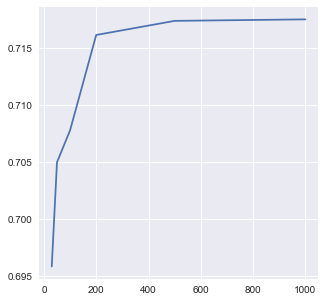

In [436]:
#### Number of tree 
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000]

for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs = -1, random_state=42)
    model.fit(X_smote, y_smote)
    print(trees, 'trees' )
    pred = model.predict(X_test)
    roc = roc_auc_score(y_test, pred)
    print ('C-stat: ', roc)
    results.append(roc)
    print ('')
fig, ax1 = plt.subplots()    
fig.set_size_inches(5,5)
pd.Series(results, n_estimator_options).plot();


2 option
C-stat:  0.6147500695000122

5 option
C-stat:  0.6355054685674963

10 option
C-stat:  0.6905888527265674

20 option
C-stat:  0.7209330072734538

30 option
C-stat:  0.7122205333161389

40 option
C-stat:  0.7161406775379131

70 option
C-stat:  0.7161406775379131



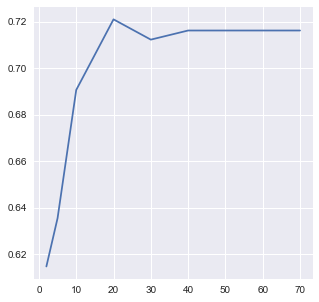

In [437]:
#### Max_depth in each tree
results = []
max_depth_options = [2, 5, 10, 20, 30, 40, 70]

for max_depth in max_depth_options:
    model = RandomForestClassifier(n_estimators=200, max_depth = max_depth, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X_smote, y_smote)
    print (max_depth, 'option')
    pred = model.predict(X_test)
    roc = roc_auc_score(y_test, pred) 
    print ('C-stat: ', roc)
    results.append(roc)
    print ("")
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)
pd.Series(results, max_depth_options).plot();


2 option
C-stat:  0.7096060908436509

4 option
C-stat:  0.7209330072734538

6 option
C-stat:  0.7161499265889605

10 option
C-stat:  0.7137039489748351

auto option
C-stat:  0.7209330072734538

sqrt option
C-stat:  0.7209330072734538



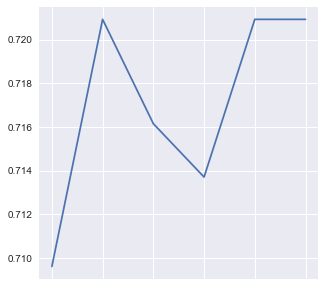

In [438]:
#### Max_number of feature in each tree
results = []
max_feature_options = [2, 4, 6, 10, 'auto', 'sqrt']

for max_feature in max_feature_options:
    model = RandomForestClassifier(n_estimators=200, max_depth = 20, oob_score=True, n_jobs=-1, random_state=42, max_features= max_feature)
    model.fit(X_smote, y_smote)
    print (max_feature, 'option')
    pred = model.predict(X_test)
    roc = roc_auc_score(y_test, pred) 
    print ('C-stat: ', roc)
    results.append(roc)
    print ("")
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)
pd.Series(results, max_feature_options).plot();

1 min samples
C-stat:  0.7202899339670606

2 min samples
C-stat:  0.7188661086229696

3 min samples
C-stat:  0.7123808061578597

4 min samples
C-stat:  0.7122575295203284

5 min samples
C-stat:  0.70995742265415

10 min samples
C-stat:  0.7001313629507327



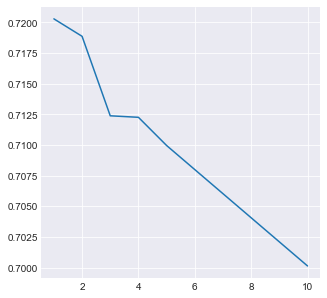

In [1638]:
### Number of leaf in each tree
results = []
min_samples_leaf_options = [1,2,3,4,5,10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=200,max_depth=20, oob_score=True, n_jobs=-1,random_state=42\
                                  , max_features = 2, min_samples_leaf = min_samples)
    model.fit(X_smote,y_smote)
    print (min_samples, 'min samples')
    pred = model.predict(X_test)
    roc = roc_auc_score(y_test, pred)
    print('C-stat: ', roc)
    results.append(roc)
    print ("")
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)
pd.Series(results, min_samples_leaf_options).plot();

# Final Model

In [446]:

rf_normal = RandomForestClassifier(n_estimators=500,max_depth=20, n_jobs=-1,\
                                                   max_features='auto', oob_score=True, random_state= 42,
                                                   min_samples_leaf= 1)
rf_normal.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [448]:
print(classification_report(y_test, pred_normal))

             precision    recall  f1-score   support

          0       0.72      0.76      0.74      2107
          1       0.70      0.66      0.68      1796

avg / total       0.71      0.71      0.71      3903



In [447]:
pred_normal = rf_normal.predict(X_test)
roc_auc_score(y_test, pred_normal)

0.7076470097025187

In [31]:

rf_app_taste_oversampling = RandomForestClassifier(n_estimators=500,max_depth=20, n_jobs=-1,\
                                                   max_features=2, oob_score=True, random_state= 42,
                                                   min_samples_leaf= 1)
rf_app_taste_oversampling.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [32]:
pred_oversampling = rf_app_taste_oversampling.predict(X_test)

In [1641]:
pred_oversampling = pd.Series(pred_oversampling)
pred_oversampling.value_counts()

0    2071
1    1832
dtype: int64

In [1642]:
y_smote = pd.Series(y_smote)
y_smote.value_counts()

1    4933
0    4933
dtype: int64

In [33]:
roc_auc_score(y_test, pred_oversampling)

0.7181038546873661

In [1351]:
roc_auc_score(y_test, pred_oversampling)

0.7243651979878293

In [34]:
y_pro_rf = rf_app_taste_oversampling.predict_proba(X_test)[::,1]
pre_rf, recall_rf, _ = roc_curve(y_test, y_pro_rf)
auc_rf_f1 = roc_auc_score(y_test, y_pro_rf)
auc_rf_f1

0.8028810529753934

In [421]:
X_train.columns

Index(['AC', 'people_per_sq_km', 'U', 'HPPE/PE100', 'CI', 'Population_2016',
       'MDPE/PE80', 'Day', 'Wind_Max', 'unlined_F', 'PVCu', 'hour',
       'Global_Sunshine', 'Baroom0800', 'Burst_Main', 'Actual_Volume_x',
       'Temp_Max', 'Temp_Soil', 'Distance', 'Elevation_m', 'Taste_DMA'],
      dtype='object')

In [465]:
X_train.shape

(9105, 20)

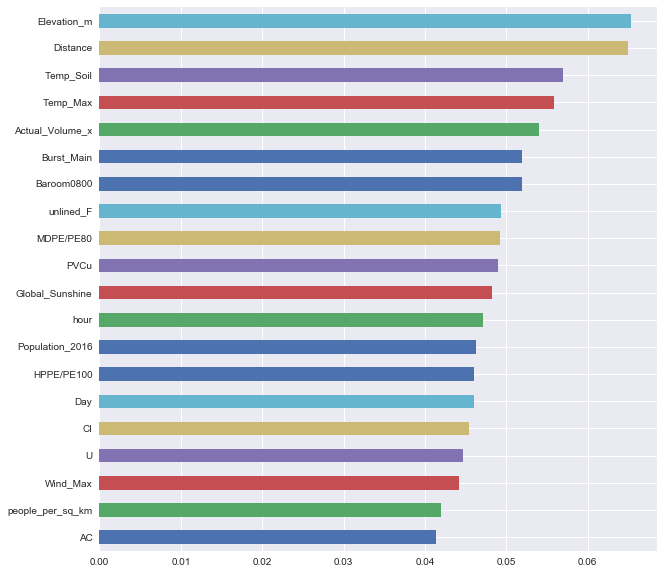

In [453]:
sns.set(style='darkgrid')
app_taste_feature_importances_= pd.Series(rf_app_taste_oversampling.feature_importances_, index = X_train.columns)
app_taste_feature_importances_ = app_taste_feature_importances_.sort_values()
app_taste_feature_importances_.plot(kind = 'barh', figsize = (10,10));

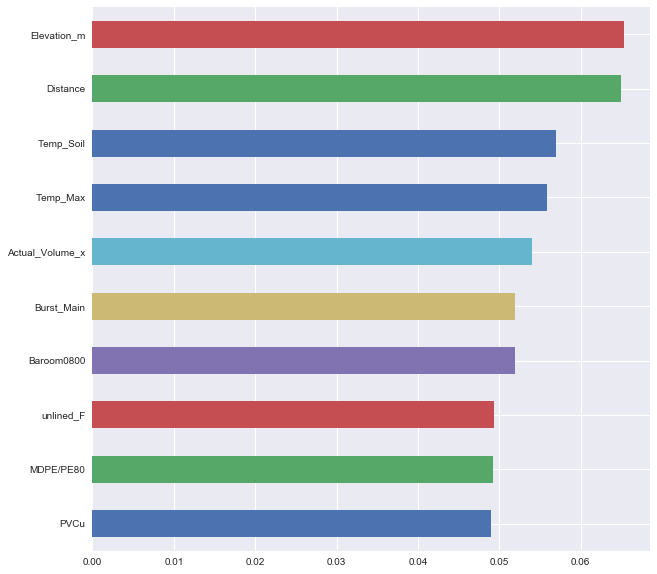

In [464]:
Rf_importance_top = Rf_importance_top.sort_values()
Rf_importance_top.plot(kind = 'barh', figsize = (10,10));

In [469]:
5968/(7040+5968)

0.45879458794587946

In [467]:
app_taste.Target_merge.value_counts()

0    7040
1    5968
Name: Target_merge, dtype: int64

In [462]:
Rf_importance_top = app_taste_feature_importances_[app_taste_feature_importances_ >= 0.048274]

In [1609]:
app_taste_feature_importances_[app_taste_feature_importances_>0.03].index

Index(['people_per_sq_km', 'AC', 'Wind_Max', 'CI', 'HPPE/PE100', 'U',
       'Population_2016', 'Global_Sunshine', 'Day', 'hour', 'MDPE/PE80',
       'unlined_F', 'PVCu', 'Baroom0800', 'Burst_Main', 'Actual_Volume_x',
       'Temp_Max', 'Temp_Soil', 'Distance', 'Elevation_m'],
      dtype='object')

# Lift Chart

In [89]:
pred_oversampling = rf_app_taste_oversampling.predict_proba(X_test)
pred_oversampling = pd.DataFrame(pred_oversampling, index=X_test.index)

In [90]:
pred_oversampling_lift = pd.concat([pred_oversampling, y_test], axis=1)

In [91]:
pred_oversampling_lift.to_csv('Lift_Chart_Testing.csv')

In [93]:
lift = pd.read_csv('Lift_Chart_Testing.csv', index_col=0)

plz = pd.merge(X_test, lift, on= X_test.index, how= 'left')
plz.index = plz.key_0
plz.head()


,key_0,AC,people_per_sq_km,U,HPPE/PE100,CI,Population_2016,MDPE/PE80,Day,Wind_Max,...,Baroom0800,Burst_Main,Actual_Volume_x,Temp_Max,Temp_Soil,Distance,Elevation_m,0,1,Target_merge
key_0,,,,,,,,,,,,,,,,,,,,,
6510,6510,0.000,3698.0,0.000,3302.532,3777.355,195971.0,4787.925,31,23.0,...,1016.0,18,1052.467,20.7,13.5,9.014034,23,0.564,0.436,0
25107,25107,5067.239,3698.0,0.000,104.425,603.173,195971.0,4725.064,7,24.0,...,1010.5,11,1082.813,18.4,13.8,8.687569,28,0.626,0.374,0
24153,24153,2275.618,3816.0,25.695,572.740,2310.614,22897.0,25479.491,17,19.0,...,1021.5,1,1049.789,13.2,9.6,7.671468,24,0.540,0.460,0
28311,28311,59.547,3976.0,5333.903,265.305,4314.248,175722.0,7842.303,8,15.0,...,1022.6,22,1069.765,8.4,3.5,4.325261,9,0.537,0.463,0
18468,18468,4331.234,4258.0,196.079,326.621,0.000,38322.0,1853.005,5,18.0,...,1015.9,14,1105.144,20.8,16.1,8.273243,50,0.548,0.452,0


In [2223]:
plz['Target_merge'][plz['0']<=0.2].value_counts()

1    155
0     26
Name: Target_merge, dtype: int64

In [2287]:
testing.Target_merge

0        0.0
7        1.0
9        1.0
10       1.0
18       0.0
19       NaN
20       1.0
21       1.0
22       NaN
23       NaN
25       NaN
26       0.0
27       1.0
28       1.0
29       1.0
31       1.0
32       0.0
38       NaN
41       NaN
43       1.0
44       0.0
45       1.0
46       NaN
47       NaN
49       NaN
50       1.0
51       NaN
52       NaN
53       1.0
56       1.0
        ... 
28914    1.0
28915    1.0
28916    0.0
28917    0.0
28918    0.0
28919    0.0
28920    0.0
28921    0.0
28922    0.0
28924    0.0
28925    1.0
28927    0.0
28928    1.0
28932    1.0
28933    1.0
28934    1.0
28935    1.0
28940    0.0
28941    1.0
28945    0.0
28946    0.0
28947    0.0
28952    0.0
28953    1.0
28954    1.0
28958    1.0
28968    1.0
28970    0.0
28974    0.0
28975    0.0
Name: Target_merge, Length: 13550, dtype: float64

In [2295]:
testing = pd.concat([app_taste, profile_app], axis=1)
testing.head()

,Actual_Volume_x,Work_Type,City,Burst_Main,Temp_Max,Temp_Min,Wind_Max,RainFall,Evapo,UV_Max,...,PVCu_Percent,AC_Percent,U_Percent,HPPE/PE100_Percent,CI_Percent,MDPE/PE80_Percent,High_Low,Long_Distance,0,1
0,1009.017,White Water,PETERBOROUGH,8,10.4,4.9,45.0,22.9,0.13,0.0,...,0.305136,0.114469,0.010473,0.012627,0.409606,0.121638,Low_Area,Far_Centre,NaN,NaN
7,1022.131,Earthy,GRIMSBY,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.004386,0.000000,0.000000,0.000000,0.651385,0.166932,Low_Area,Close_Centre,NaN,NaN
9,1022.131,TCP,IPSWICH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.072050,0.527236,0.254153,0.054367,0.003627,0.015712,Low_Area,Far_Centre,NaN,NaN
10,1022.131,Chlorine,FELIXSTOWE,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.004244,0.002880,0.000000,0.053762,0.004081,0.935034,Low_Area,Close_Centre,NaN,NaN
18,1022.131,White Water,WISBECH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.164718,0.126390,0.048790,0.019647,0.344397,0.152300,Low_Area,Close_Centre,NaN,NaN


In [2301]:
high_profile = testing[testing['0'].notna()]

In [2403]:
high_taste_MA = pd.concat([water, profile_taste], axis=1)
high_taste_MA = high_taste_MA[high_taste_MA['0'].notna()]
high_taste_MA

,Ref,Raised_Date,Raised_Time,Work_Category,Work_Type,City,District,DMASHORTNA,lat_x,long,...,Elevation_m,lat,lng,Distance,Rolling (365 Day),Rolling (7 Day),Actual_Rolling,0,1,Target_merge
81,276692405,06/01/2014,10:17:00,Water Quality,TCP,BURY ST. EDMUNDS,West Row,ISLEHAMA,52.347640,0.450339,...,3,52.246300,0.711110,21.010644,1096.733,1035.638,3.591,0.220865,0.779135,1.0
86,449499289,06/01/2014,09:37:00,Water Quality,TCP,COLCHESTER,Stanway,COLCSTMA,51.889086,0.846794,...,41,51.889210,0.904210,3.940358,1096.733,1035.638,3.591,0.208511,0.791489,1.0
107,756389809,07/01/2014,13:04:00,Water Quality,Earthy,GAINSBOROUGH,Marton,NEWTORMA,53.328260,-0.740214,...,12,53.383330,-0.766670,6.370246,1096.776,1038.688,32.081,0.261425,0.738575,1.0
125,581003709,07/01/2014,12:41:00,Info Only,Earthy,BRAINTREE,NaN,BRASWSMA,51.877791,0.555472,...,66,51.878190,0.552920,0.180709,1096.776,1038.688,32.081,0.166060,0.833940,1.0
144,493359686,08/01/2014,16:05:00,Info Only,TCP,GRANTHAM,NaN,GRACENMA,52.904571,-0.633588,...,56,52.911490,-0.641840,0.947693,1096.744,1046.327,16.161,0.234118,0.765882,1.0
172,791515059,09/01/2014,14:02:00,Info Only,TCP,GRIMSBY,NaN,SHWOODMA,53.545005,-0.130077,...,20,53.565390,-0.075530,4.256785,1096.665,1051.721,8.166,0.274773,0.725227,1.0
206,197135942,10/01/2014,08:40:00,Info Only,White Water,LOUTH,Conisholme,NSOMERMA,53.442182,0.106321,...,1,53.366640,-0.004380,11.153928,1096.649,1053.804,14.458,0.167837,0.832163,0.0
209,233589317,10/01/2014,14:04:00,Info Only,TCP,NORWICH,Poringland,FRAME2MA,52.568430,1.348154,...,50,52.627830,1.298340,7.412489,1096.649,1053.804,14.458,0.230817,0.769183,1.0
237,207635264,13/01/2014,10:11:00,Water Quality,Chlorine,LINCOLN,NaN,QERDWEMA,53.254154,-0.547526,...,69,53.226830,-0.537920,3.104802,1096.615,1065.873,2.376,0.213180,0.786820,1.0
264,564126878,14/01/2014,10:11:00,Water Quality,TCP,LOUTH,Legbourne,RESTONMA,53.335177,0.055985,...,21,53.366640,-0.004380,5.319083,1096.618,1063.594,-8.780,0.177514,0.822486,1.0


In [2402]:
profile_taste = plz.loc[:, ('0','1', 'Target_merge')][plz['0']<=0.3]
profile_taste.head()

,0,1,Target_merge
key_0,,,
14887,0.201847,0.798153,1
5855,0.177053,0.822947,1
13000,0.265672,0.734328,1
27845,0.271311,0.728689,1
2081,0.287849,0.712151,1


In [2293]:
profile_app = plz.loc[:, ('0', '1')][plz['0']>=0.7]

In [2408]:
app_taste.Target_merge[(app_taste.PVCu >54)&(app_taste.PVCu <330)].value_counts()

1    444
0    357
Name: Target_merge, dtype: int64

In [274]:
from treeinterpreter import treeinterpreter as ti

In [1970]:
instance1 = instance1.values
instance1 = np.repeat(instance1, 550, axis=0)
instance1 = pd.DataFrame(instance1, columns=X_test.columns)
instance1.to_csv('instance1.csv')

instance2 = instance2.values
instance2 = np.repeat(instance2, 550, axis=0)
instance2 = pd.DataFrame(instance2, columns=X_test.columns)
instance2.to_csv('instance2.csv')

instance3 = instance3.values
instance3 = np.repeat(instance3, 550, axis=0)
instance3 = pd.DataFrame(instance3, columns=X_test.columns)
instance3.to_csv('instance3.csv')

instance4 = instance4.values
instance4 = np.repeat(instance4, 550, axis=0)
instance4 = pd.DataFrame(instance4, columns=X_test.columns)
instance4.to_csv('instance4.csv')

instance5 = instance5.values
instance5 = np.repeat(instance5, 550, axis=0)
instance5 = pd.DataFrame(instance5, columns=X_test.columns)
instance5.to_csv('instance5.csv')

In [1968]:
app_taste.Distance.describe()

count    13008.000000
mean         6.444295
std          6.041878
min          0.000000
25%          1.700189
50%          4.459999
75%          9.355656
max         55.199411
Name: Distance, dtype: float64

In [1540]:
instance1 = X_test.iloc[np.random.random_integers(0, len(X_test) , 1)]
instance2 = X_test.iloc[np.random.random_integers(0, len(X_test) , 1)]
instance3 = X_test.iloc[np.random.random_integers(0, len(X_test) , 1)]
instance4 = X_test.iloc[np.random.random_integers(0, len(X_test) , 1)]
instance5 = X_test.iloc[np.random.random_integers(0, len(X_test) , 1)]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 3903 + 1) instead
  """Entry point for launching an IPython kernel.


In [1495]:
X_featurenames = instance.columns

In [1496]:
prediction, bias, contributions = ti.predict(rf_app_taste_oversampling, instance)
print ("Prediction", prediction)
print ("Bias (trainset prior)", bias)
print ("Feature contributions:")
for c, feature in zip(contributions[0], 
                             X_featurenames):
    print (feature, c)

Prediction [[0.937 0.063]]
Bias (trainset prior) [[0.49989793 0.50010207]]
Feature contributions:
AC [ 0.01193007 -0.01193007]
people_per_sq_km [ 0.02270646 -0.02270646]
U [-0.01865861  0.01865861]
HPPE/PE100 [ 0.00396129 -0.00396129]
CI [ 0.01017034 -0.01017034]
Population_2016 [ 0.06011154 -0.06011154]
MDPE/PE80 [-0.00306878  0.00306878]
Day [ 0.01633992 -0.01633992]
Wind_Max [ 0.02178034 -0.02178034]
unlined_F [ 0.01022854 -0.01022854]
PVCu [ 0.01045003 -0.01045003]
hour [ 6.96143087e-05 -6.96143087e-05]
Global_Sunshine [ 0.00404595 -0.00404595]
Baroom0800 [ 0.00792399 -0.00792399]
Burst_Main [-0.01319488  0.01319488]
Actual_Volume_x [ 0.03950733 -0.03950733]
Temp_Max [ 0.05937203 -0.05937203]
Temp_Soil [ 0.05492037 -0.05492037]
Distance [ 0.04548283 -0.04548283]
Elevation_m [ 0.0930237 -0.0930237]


In [1665]:
app_taste.PVCu.head()

0      5949.222
7        29.502
9      3035.486
10       63.769
18    10520.637
Name: PVCu, dtype: float64

(0, 2)

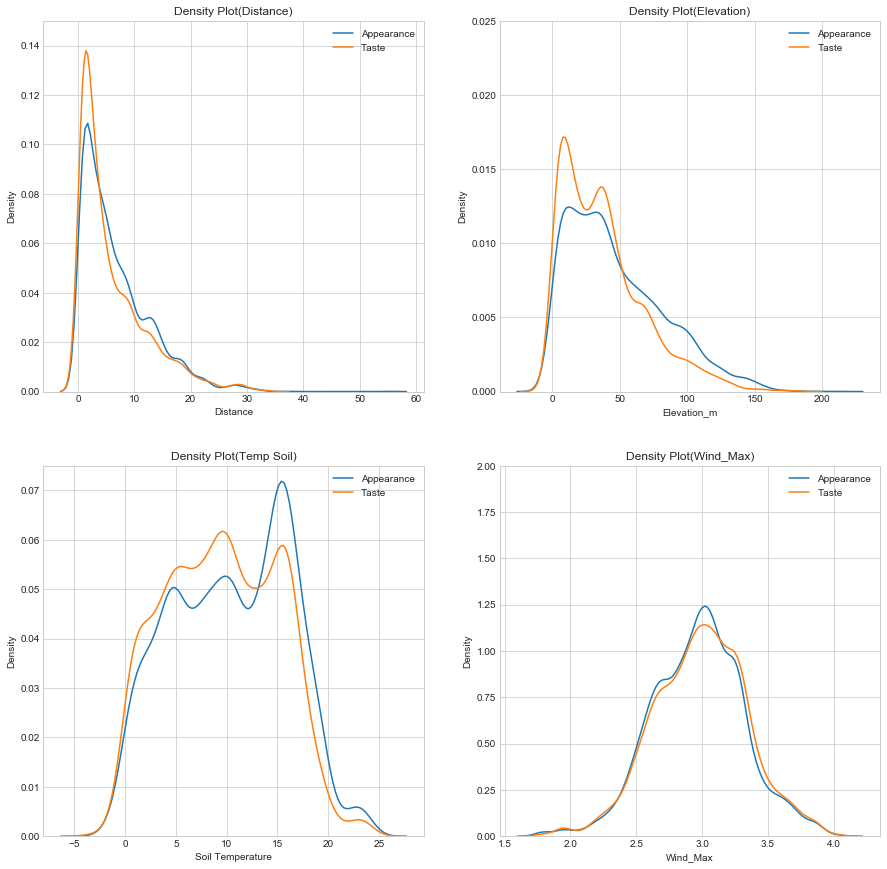

In [1787]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,15)
plt.ylim(0,1.5)
# this is to plot the kde
####Distance for Taste
sns.kdeplot(app_taste['Distance'][app_taste.Target_merge == 0],label='Appearance',ax=axes[0,0]);
sns.kdeplot(app_taste['Distance'][app_taste.Target_merge == 1],label='Taste',ax=axes[0,0]);
axes[0,0].set(ylabel='Density', xlabel = 'Distance',title="Density Plot(Distance)")
axes[0,0].set_ylim(0,0.15)
#####Elevation for Taste
sns.kdeplot(app_taste['Elevation_m'][app_taste.Target_merge == 0],label='Appearance',ax=axes[0,1]);
sns.kdeplot(app_taste['Elevation_m'][app_taste.Target_merge == 1],label='Taste',ax=axes[0,1]);
axes[0,1].set(ylabel='Density', xlabel = 'Elevation_m',title="Density Plot(Elevation)")
axes[0,1].set_ylim(0,0.025)

#####Distance for Appearance
sns.kdeplot(app_taste['Temp_Soil'][app_taste.Target_merge == 0],label='Appearance',ax=axes[1,0]);
sns.kdeplot(app_taste['Temp_Soil'][app_taste.Target_merge == 1],label='Taste',ax=axes[1,0]);
axes[1,0].set(ylabel='Density', xlabel = 'Soil Temperature',title="Density Plot(Temp Soil)")
axes[1,0].set_ylim(0,.075)
####Elevation for Appearnce
sns.kdeplot(app_taste['Wind_Max'][app_taste.Target_merge == 0].apply(np.log1p),label='Appearance',ax=axes[1,1]);
sns.kdeplot(app_taste['Wind_Max'][app_taste.Target_merge == 1].apply(np.log1p),label='Taste',ax=axes[1,1]);
axes[1,1].set(ylabel='Density', xlabel = 'Wind_Max',title="Density Plot(Wind_Max)")
axes[1,1].set_ylim(0,2)

In [1703]:
app_taste['PVCu_Percent']= app_taste.PVCu/app_taste.Length_m
app_taste['AC_Percent']= app_taste.AC/app_taste.Length_m
app_taste['U_Percent']= app_taste.U/app_taste.Length_m
app_taste['HPPE/PE100_Percent']= app_taste['HPPE/PE100']/app_taste.Length_m
app_taste['CI_Percent']= app_taste.CI/app_taste.Length_m
app_taste['MDPE/PE80_Percent']= app_taste['MDPE/PE80']/app_taste.Length_m

In [1704]:
app_taste.head()

,Actual_Volume_x,Work_Type,City,Burst_Main,Temp_Max,Temp_Min,Wind_Max,RainFall,Evapo,UV_Max,...,Population_2016,people_per_sq_km,Elevation_m,Target_merge,PVCu_Percent,AC_Percent,U_Percent,HPPE/PE100_Percent,CI_Percent,MDPE/PE80_Percent
0,1009.017,White Water,PETERBOROUGH,8,10.4,4.9,45.0,22.9,0.13,0.0,...,175722.0,3976.0,26,0,0.305136,0.114469,0.010473,0.012627,0.409606,0.121638
7,1022.131,Earthy,GRIMSBY,19,9.7,5.6,28.0,7.2,0.46,0.5,...,133534.0,5564.0,5,1,0.004386,0.000000,0.000000,0.000000,0.651385,0.166932
9,1022.131,TCP,IPSWICH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,181949.0,3713.0,31,1,0.072050,0.527236,0.254153,0.054367,0.003627,0.015712
10,1022.131,Chlorine,FELIXSTOWE,19,9.7,5.6,28.0,7.2,0.46,0.5,...,29464.0,2455.0,0,1,0.004244,0.002880,0.000000,0.053762,0.004081,0.935034
18,1022.131,White Water,WISBECH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,34910.0,2685.0,3,0,0.164718,0.126390,0.048790,0.019647,0.344397,0.152300


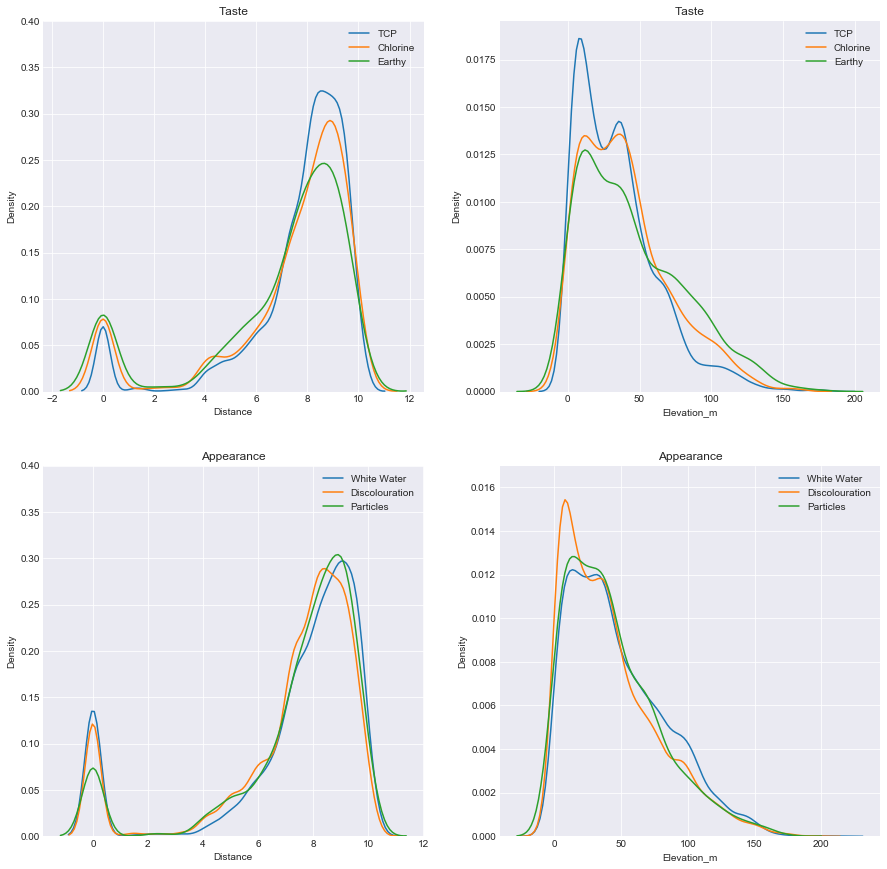

In [80]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,15)
plt.ylim(0,1.5)
# this is to plot the kde
####Distance for Taste
sns.kdeplot(water['PVCu'][water.Work_Type == 'TCP'].apply(np.log1p),label='TCP',ax=axes[0,0]);
sns.kdeplot(water['PVCu'][water.Work_Type == 'Chlorine'].apply(np.log1p),label='Chlorine',ax=axes[0,0]);
sns.kdeplot(water['PVCu'][water.Work_Type == 'Earthy'].apply(np.log1p),label='Earthy',ax=axes[0,0]);
axes[0,0].set(ylabel='Density', xlabel = 'Distance',title="Taste")
axes[0,0].set_ylim(0,0.4)
#####Elevation for Taste
sns.kdeplot(water['Elevation_m'][water.Work_Type == 'TCP'],label='TCP',ax=axes[0,1]);
sns.kdeplot(water['Elevation_m'][water.Work_Type == 'Chlorine'],label='Chlorine',ax=axes[0,1]);
sns.kdeplot(water['Elevation_m'][water.Work_Type == 'Earthy'],label='Earthy',ax=axes[0,1]);
axes[0,1].set(ylabel='Density', xlabel = 'Elevation_m',title="Taste")
#####Distance for Appearance
sns.kdeplot(water['PVCu'][water.Work_Type == 'White Water'].apply(np.log1p),label='White Water',ax=axes[1,0]);
sns.kdeplot(water['PVCu'][water.Work_Type == 'Discolouration'].apply(np.log1p),label='Discolouration',ax=axes[1,0]);
sns.kdeplot(water['PVCu'][water.Work_Type == 'Particles'].apply(np.log1p),label='Particles',ax=axes[1,0]);
axes[1,0].set(ylabel='Density', xlabel = 'Distance',title="Appearance")
axes[1,0].set_ylim(0,0.4)
####Elevation for Appearnce
sns.kdeplot(water['Elevation_m'][water.Work_Type == 'White Water'],label='White Water',ax=axes[1,1]);
sns.kdeplot(water['Elevation_m'][water.Work_Type == 'Discolouration'],label='Discolouration',ax=axes[1,1]);
sns.kdeplot(water['Elevation_m'][water.Work_Type == 'Particles'],label='Particles',ax=axes[1,1]);
axes[1,1].set(ylabel='Density', xlabel = 'Elevation_m',title="Appearance")
axes[1,1].set_ylim(0,0.017)

# beautifying the labels

plt.show()

In [703]:
app_taste.Target_merge[app_taste.Elevation_m <50].value_counts()

1    4306
0    4221
Name: Target_merge, dtype: int64

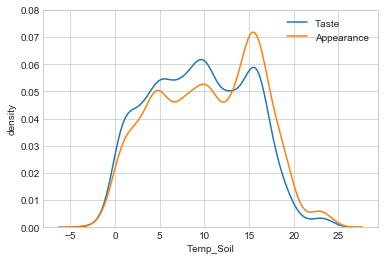

In [2038]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
plt.ylim(0, 0.08)
# this is to plot the kde
sns.kdeplot(app_taste.Temp_Soil[app_taste.Target_merge == 1],label='Taste');
sns.kdeplot(app_taste.Temp_Soil[app_taste.Target_merge == 0],label='Appearance');

# beautifying the labels
plt.xlabel('Temp_Soil')
plt.ylabel('density')
plt.show()

In [2414]:
instance1 = X_test[X_test.index == 18876]
instance2 = X_test[X_test.index == 4776]
instance3 = X_test[X_test.index == 23364 ]
instance4 = X_test[X_test.index == 10554]
instance5 = X_test[X_test.index == 13010]

In [2416]:
instance1 = instance1.values
instance1 = np.repeat(instance1, 218, axis=0)
instance1 = pd.DataFrame(instance1, columns=X_test.columns)
instance1.to_csv('instance1.csv')

instance2 = instance2.values
instance2 = np.repeat(instance2, 218, axis=0)
instance2 = pd.DataFrame(instance2, columns=X_test.columns)
instance2.to_csv('instance2.csv')

instance3 = instance3.values
instance3 = np.repeat(instance3, 218, axis=0)
instance3 = pd.DataFrame(instance3, columns=X_test.columns)
instance3.to_csv('instance3.csv')

instance4 = instance4.values
instance4 = np.repeat(instance4, 218, axis=0)
instance4 = pd.DataFrame(instance4, columns=X_test.columns)
instance4.to_csv('instance4.csv')

instance5 = instance5.values
instance5 = np.repeat(instance5, 218, axis=0)
instance5 = pd.DataFrame(instance5, columns=X_test.columns)
instance5.to_csv('instance5.csv')

In [2417]:
instance1 = pd.read_csv('instance1.csv', index_col=0)
instance2 = pd.read_csv('instance2.csv', index_col = 0)
instance3 = pd.read_csv('instance3.csv', index_col=0)
instance4 = pd.read_csv('instance4.csv', index_col=0)
instance5 = pd.read_csv('instance5.csv', index_col=0)

In [2045]:
instance1

,AC,people_per_sq_km,U,HPPE/PE100,CI,Population_2016,MDPE/PE80,Day,Wind_Max,unlined_F,PVCu,hour,Global_Sunshine,Baroom0800,Burst_Main,Actual_Volume_x,Temp_Max,Temp_Soil,Distance,Elevation_m
0,0,4224,0,560.214,4424.99,54916,412.876,23,20,49.265721,2751.567,9,11.3,1021.2,2,1037.769,10.3,-3,2.96504,59
1,0,4224,0,560.214,4424.99,54916,412.876,23,20,49.265721,2751.567,9,11.3,1021.2,2,1037.769,10.3,-2,2.96504,59
2,0,4224,0,560.214,4424.99,54916,412.876,23,20,49.265721,2751.567,9,11.3,1021.2,2,1037.769,10.3,-1,2.96504,59
3,0,4224,0,560.214,4424.99,54916,412.876,23,20,49.265721,2751.567,9,11.3,1021.2,2,1037.769,10.3,0,2.96504,59
4,0,4224,0,560.214,4424.99,54916,412.876,23,20,49.265721,2751.567,9,11.3,1021.2,2,1037.769,10.3,1,2.96504,59
5,0,4224,0,560.214,4424.99,54916,412.876,23,20,49.265721,2751.567,9,11.3,1021.2,2,1037.769,10.3,2,2.96504,59
6,0,4224,0,560.214,4424.99,54916,412.876,23,20,49.265721,2751.567,9,11.3,1021.2,2,1037.769,10.3,3,2.96504,59
7,0,4224,0,560.214,4424.99,54916,412.876,23,20,49.265721,2751.567,9,11.3,1021.2,2,1037.769,10.3,4,2.96504,59
8,0,4224,0,560.214,4424.99,54916,412.876,23,20,49.265721,2751.567,9,11.3,1021.2,2,1037.769,10.3,5,2.96504,59
9,0,4224,0,560.214,4424.99,54916,412.876,23,20,49.265721,2751.567,9,11.3,1021.2,2,1037.769,10.3,6,2.96504,59


In [2418]:
instance1_prob = rf_app_taste_oversampling.predict_proba(instance1)
instance1_prob = pd.DataFrame(instance1_prob, index = instance1.Elevation_m)
instance2_prob = rf_app_taste_oversampling.predict_proba(instance2)
instance2_prob = pd.DataFrame(instance2_prob, index = instance2.Elevation_m)
instance3_prob = rf_app_taste_oversampling.predict_proba(instance3)
instance3_prob = pd.DataFrame(instance3_prob, index = instance3.Elevation_m)
instance4_prob = rf_app_taste_oversampling.predict_proba(instance4)
instance4_prob = pd.DataFrame(instance4_prob, index = instance4.Elevation_m)
instance5_prob = rf_app_taste_oversampling.predict_proba(instance5)
instance5_prob = pd.DataFrame(instance5_prob, index = instance5.Elevation_m)
instance5_prob = pd.DataFrame(instance5_prob)

Text(0.5,1,'Sensitivity on Elevation')

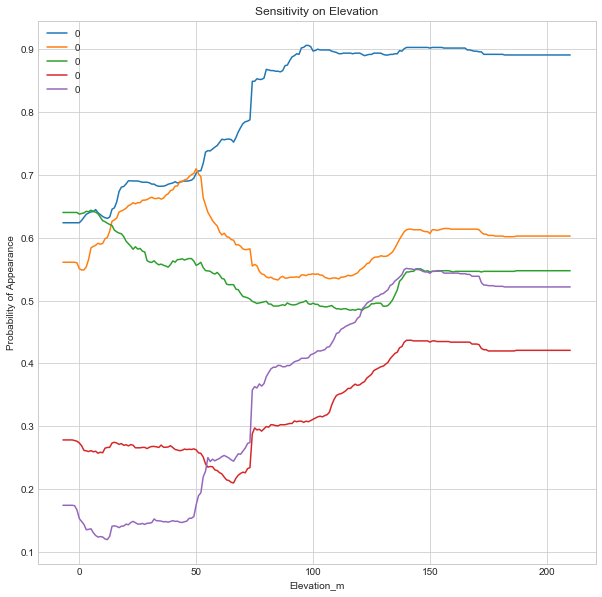

In [2419]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,10)
instance1_prob[0].plot(ax=ax1, x = instance1_prob.index, legend=['instance1'] );
instance2_prob[0].plot(ax=ax1, x = instance2_prob.index, legend=['instance2']);
instance3_prob[0].plot(ax=ax1, x = instance3_prob.index, legend=['instance3']);
instance4_prob[0].plot(ax=ax1, x = instance4_prob.index, legend=['instance4']);
instance5_prob[0].plot(ax=ax1, x = instance5_prob.index, legend=['instance5']);
plt.xlabel('Elevation_m')
plt.ylabel('Probability of Appearance')
plt.title('Sensitivity on Elevation')


In [1845]:
MILTON_KEYNES  = app_taste[app_taste.City == 'MILTON KEYNES']
MILTON_KEYNES.head()

,Actual_Volume_x,Work_Type,City,Burst_Main,Temp_Max,Temp_Min,Wind_Max,RainFall,Evapo,UV_Max,...,Population_2016,people_per_sq_km,Elevation_m,Target_merge,PVCu_Percent,AC_Percent,U_Percent,HPPE/PE100_Percent,CI_Percent,MDPE/PE80_Percent
29,1053.679,Chlorine,MILTON KEYNES,26,10.1,4.9,30.0,22.3,0.53,0.5,...,242679.0,3677.0,88,1,0.000000,0.828272,0.000000,0.112172,0.039450,0.017229
31,1053.679,Chlorine,MILTON KEYNES,26,10.1,4.9,30.0,22.3,0.53,0.5,...,242679.0,3677.0,82,1,0.000000,0.000000,0.000131,0.016691,0.000000,0.983179
71,1029.615,TCP,MILTON KEYNES,2,7.8,0.7,31.0,24.2,0.16,0.0,...,242679.0,3677.0,121,1,0.062356,0.316562,0.000906,0.097261,0.030540,0.407402
135,1062.488,White Water,MILTON KEYNES,13,10.1,6.1,28.0,8.7,0.26,0.5,...,242679.0,3677.0,103,0,0.000000,0.828272,0.000000,0.112172,0.039450,0.017229
137,1062.488,TCP,MILTON KEYNES,13,10.1,6.1,28.0,8.7,0.26,0.5,...,242679.0,3677.0,79,1,0.000000,0.594260,0.000000,0.379791,0.007158,0.014502


In [1865]:
from scipy.stats import chi2_contingency

In [2413]:
contingency = pd.crosstab(app_taste.Target_merge, app_taste.PVCu_Taste_Freq, margins=False)
contingency  

PVCu_Taste_Freq,Normal,PVCu_Taste_Frequ
Target_merge,,
0,6683,357
1,5524,444


In [2412]:
chi2, p, dof, ex = chi2_contingency(contingency, correction=False)
(chi2, p) == scipy.stats.chisquare(contingency.ravel(), f_exp=ex.ravel(),
                             ddof=contingency.size - 1 - dof)

chi2_contingency(contingency)

(30.951314043521297,
 2.645828840990553e-08,
 1,
 array([[6606.49446494,  433.50553506],
        [5600.50553506,  367.49446494]]))

In [1987]:
long_distance= []
for distance in app_taste.Distance:
    if distance >=3.75:
        long_distance.append('Far_Centre')
    else:
        long_distance.append('Close_Centre')
long_distance = pd.Series(long_distance, index = app_taste.index)
app_taste['Long_Distance'] = long_distance

In [2410]:
PVCu_Taste_Freq = []
for pvcu in app_taste.PVCu:
    if (pvcu >54) & (pvcu< 330):
        PVCu_Taste_Freq.append('PVCu_Taste_Frequ')
    else:
        PVCu_Taste_Freq.append('Normal')
PVCu_Taste_Freq = pd.Series(PVCu_Taste_Freq, index = app_taste.index)
app_taste['PVCu_Taste_Freq'] = PVCu_Taste_Freq

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0.5,'Counts'), Text(0.5,0,'Appearance VS Taste')]

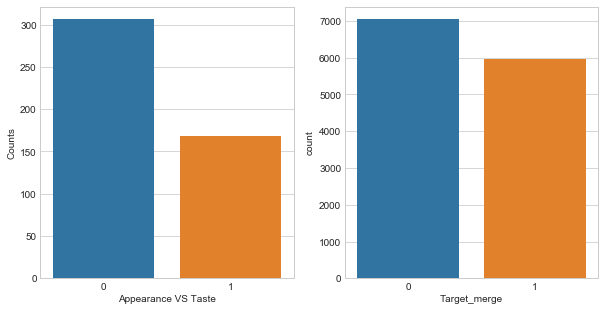

In [1847]:
fig, ax1 = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
sns.countplot(x="Target_merge", data=MILTON_KEYNES, ax=ax1[0])
sns.countplot(x= 'Target_merge', data = app_taste, ax= ax1[1])
ax1[0].set(ylabel='Counts', xlabel = 'Appearance VS Taste')

In [1817]:
water.City[water.Elevation_m>50].value_counts()

NORTHAMPTON           1421
MILTON KEYNES          975
KETTERING              517
GRANTHAM               474
BRAINTREE              441
WELLINGBOROUGH         421
BURY ST. EDMUNDS       351
BEDFORD                325
DAVENTRY               246
LINCOLN                239
LEIGHTON BUZZARD       230
HAVERHILL              215
DEREHAM                214
SUDBURY                206
CORBY                  203
RUSHDEN                196
BUCKINGHAM             179
TOWCESTER              179
HALSTEAD               178
NORWICH                173
HOLT                   130
COLCHESTER             129
KING'S LYNN            126
IPSWICH                110
STAMFORD               109
STOWMARKET              96
MARKET RASEN            92
CROMER                  86
NEWPORT PAGNELL         79
BRACKLEY                75
                      ... 
NEWARK                  26
SLEAFORD                25
PETERBOROUGH            24
LOUTH                   21
DISS                    20
SHERINGHAM              19
A

In [1806]:
instance1_prob = rf_app_taste_oversampling.predict_proba(instance1)
instance1_prob = pd.DataFrame(instance1_prob)
instance2_prob = rf_app_taste_oversampling.predict_proba(instance2)
instance2_prob = pd.DataFrame(instance2_prob)
instance3_prob = rf_app_taste_oversampling.predict_proba(instance3)
instance3_prob = pd.DataFrame(instance3_prob)
instance4_prob = rf_app_taste_oversampling.predict_proba(instance4)
instance4_prob = pd.DataFrame(instance4_prob)
instance5_prob = rf_app_taste_oversampling.predict_proba(instance5)
instance5_prob = pd.DataFrame(instance5_prob)

In [1972]:
instance1 = pd.read_csv('instance1.csv', index_col=0)
instance2 = pd.read_csv('instance2.csv', index_col = 0)
instance3 = pd.read_csv('instance3.csv', index_col=0)
instance4 = pd.read_csv('instance4.csv', index_col=0)
instance5 = pd.read_csv('instance5.csv', index_col=0)

# Log Transformation

In [910]:
X.columns

Index(['Actual_Volume', 'Burst_Main', 'Temp_Max', 'Wind_Max', 'RainFall',
       'Global_Sunshine', 'Baroom0800', 'Temp_Soil', 'hour', 'day_of_week',
       'Quater', 'Day', 'Weekend', 'AC', 'CI', 'CO', 'DI', 'DI+CM', 'DI+CM+AL',
       'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'HDPE', 'HPPE/PE100', 'HPPE-PL',
       'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH', 'PE', 'PVC-M', 'PVCu',
       'SI', 'ST', 'U', 'unlined_F', 'Distance', 'Population_2016',
       'people_per_sq_km', 'Elevation_m'],
      dtype='object')

In [911]:
#### Log Transformation ('Distance', 'Temp_Max', 'HPPE-PL', 'MDPE/PE80', 'PVCu', 'unlined_F' )
X['Distance_log'] = X.Distance.apply(np.log1p)
X['Temp_Max_log'] = X.Temp_Max.apply(np.log1p)
X['HPPE-PL_log'] = X['HPPE-PL'].apply(np.log1p)
X['MDPE/PE80_log'] = X['MDPE/PE80'].apply(np.log1p)
X['PVCu_log'] = X.PVCu.apply(np.log1p)
X['unlined_F_log'] = X.unlined_F.apply(np.log1p)
X['Temp_Soil_log'] = X.Temp_Soil.apply(np.log1p)
X['DI+CM+EP_log'] = X['DI+CM+EP'].apply(np.log1p)
X['DI+EP'] = X['DI+EP'].apply(np.log1p)
X.columns

Index(['Actual_Volume', 'Burst_Main', 'Temp_Max', 'Wind_Max', 'RainFall',
       'Global_Sunshine', 'Baroom0800', 'Temp_Soil', 'hour', 'day_of_week',
       'Quater', 'Day', 'Weekend', 'AC', 'CI', 'CO', 'DI', 'DI+CM', 'DI+CM+AL',
       'DI+CM+EP', 'DI+EP', 'GA', 'GI', 'HDPE', 'HPPE/PE100', 'HPPE-PL',
       'LDPE', 'LP', 'MDPE/PE80', 'MDPE-PL', 'OTH', 'PE', 'PVC-M', 'PVCu',
       'SI', 'ST', 'U', 'unlined_F', 'Distance', 'Population_2016',
       'people_per_sq_km', 'Elevation_m', 'Distance_log', 'Temp_Max_log',
       'HPPE-PL_log', 'MDPE/PE80_log', 'PVCu_log', 'unlined_F_log',
       'Temp_Soil_log', 'DI+CM+EP_log'],
      dtype='object')

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# ANN

In [135]:
feature_names = X.columns

In [136]:
from sklearn.preprocessing import StandardScaler
### StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X.select_dtypes(('float', 'int')))
X_scaled = scaler.transform(X.select_dtypes(('float', 'int')))

In [126]:
X_scaled = pd.DataFrame(X_scaled, columns=feature_names, index = X.index)

In [137]:
X_scaled = pd.DataFrame(X_scaled, columns=feature_names, index =X.index)
X_scaled.hour = X.hour
X_scaled.hour = X_scaled.hour.astype('category', ordered = True)
X_scaled.Day = X.Day
X_scaled.Day = X_scaled.Day.astype('category', ordered = True)
X_scaled.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


,AC,people_per_sq_km,U,HPPE/PE100,CI,Population_2016,MDPE/PE80,Day,Wind_Max,unlined_F,PVCu,hour,Global_Sunshine,Baroom0800,Burst_Main,Actual_Volume_x,Temp_Max,Temp_Soil,Distance,Elevation_m
0,-0.316335,0.484072,-0.164743,-0.559276,0.120614,1.172054,-0.631104,1,3.366160,0.360881,0.048565,20,-1.734803,-1.864523,-1.038856,-1.766000,-0.764151,-0.42143,1.866522,-0.497662
7,-0.563309,2.335975,-0.259599,-0.628392,-0.270332,0.625959,-0.798659,2,1.085622,1.847100,-0.972703,10,-0.765079,-2.051225,0.194849,-1.483813,-0.879658,-0.69908,-0.971405,-1.120733
9,1.894790,0.177365,4.714632,0.014653,-0.728958,1.252658,-0.860499,2,1.085622,-1.042496,-0.454112,17,-0.765079,-2.051225,0.194849,-1.483813,-0.879658,-0.69908,0.281181,-0.349312
10,-0.558520,-1.289697,-0.259599,-0.401587,-0.738882,-0.721155,0.936004,2,1.085622,-1.325383,-0.966791,16,-0.765079,-2.051225,0.194849,-1.483813,-0.879658,-0.69908,-0.927906,-1.269084
18,0.330020,-1.021474,1.188073,-0.276087,1.640186,-0.650660,0.355916,2,1.085622,0.480950,0.837224,9,-0.765079,-2.051225,0.194849,-1.483813,-0.879658,-0.69908,-0.932802,-1.180073


In [77]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_, y, test_size = 0.3, random_state=42)

In [78]:
#### Oversampling and undersampling
from collections import Counter

X_smote_scaled, y_smote_scaled = SMOTE().fit_sample(X_train_scaled, y_train_scaled)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(X_train, y_train)
print('SMOTE data distribution: {}'.format(Counter(y_smote)))
print('NearMiss Pipeline Score: {}'.format(Counter(y_nearmiss)))

SMOTE data distribution: Counter({0: 4933, 1: 4933})
NearMiss Pipeline Score: Counter({0: 4172, 1: 4172})


In [143]:
parameters={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(100,1)],
'alpha': [10.0 ** -np.arange(1, 7)],
'activation': ["logistic", "relu", "tanh"]
}
parameters

{'activation': ['logistic', 'relu', 'tanh'],
 'alpha': [array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])],
 'hidden_layer_sizes': [(100, 1)],
 'learning_rate': ['constant', 'invscaling', 'adaptive']}

In [1005]:
clf_ann = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10, 15),max_iter=1000,random_state=22,
                    alpha = 1.e-05, learning_rate = 'constant', activation = 'relu')

(9105, 18)

In [148]:
from sklearn.neural_network import MLPClassifier
clf_ann = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(500, 50),max_iter=1000,random_state=22,
                    alpha = 1.e-05, learning_rate = 'constant', activation = 'relu')

In [149]:
clf_ann.fit(X_train_scaled, y_train_scaled)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=22, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [150]:
pred_ann = clf_ann.predict(X_test_scaled)

In [151]:
roc_auc_score(y_test, pred_ann)

0.6583493033614751

In [152]:
y_pro_ann = clf_ann.predict_proba(X_test_scaled)[::,1]
pre_ann, recall_ann, _ = roc_curve(y_test, y_pro_ann)
auc_ann_f1 = roc_auc_score(y_test, y_pro_ann)
auc_ann_f1

0.695962947772987

In [153]:
train_ANN = clf_ann.predict(X_smote_scaled)
roc_auc_score(y_smote_scaled, train_ANN)

0.992904926008514

In [1184]:
parameters={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(100,1)],
'alpha': [10.0 ** -np.arange(1, 7)],
'activation': ["logistic", "relu", "tanh"]
}


In [626]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [627]:
clf_try = MLPClassifier()

In [628]:
parameters={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(100)],
'alpha': [10.0 ** -np.arange(1, 7)],
'activation': ["logistic", "relu", "tanh"]
}



In [636]:
clf_CV = GridSearchCV(estimator=MLPClassifier(),param_grid= parameters,n_jobs=1, cv = 5)
clf_CV.fit(X.all(),y.all())

TypeError: Singleton array False cannot be considered a valid collection.

#Logistic Regression 

In [87]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=42)
lg.fit(X_train_scaled, y_train_scaled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
pred_logi = lg.predict(X_test_scaled)
roc_auc_score(y_test, pred_logi)

0.5905890377075884

In [1019]:
from sklearn.tree import DecisionTreeClassifier
C = DecisionTreeClassifier(min_samples_split=100)

In [1020]:
Decision_Tree = C.fit(X_smote, y_smote)

In [1021]:
Dec_pred = Decision_Tree.predict()

TypeError: predict() missing 1 required positional argument: 'X'

# Decision Tree visualisation

In [881]:
from sklearn.tree import export_graphviz
import pydotplus
import io
import image
import scipy.misc
image.MAX_IMAGE_PIXELS = 1000000000

In [403]:
features = X_train.columns

In [432]:
X_train.Weekend = X_train.Weekend.astype('category')
X_train.Weekend.dtypes

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


CategoricalDtype(categories=[0, 1], ordered=False)

In [429]:
X_train.dtypes

Actual_Volume       float64
long                float64
lat_x               float64
Burst_Main            int64
Temp_Max            float64
Wind_Max            float64
RainFall            float64
Evapo               float64
UV_Max              float64
Solar_Energy        float64
Global_Sunshine     float64
Temp0800            float64
Baroom0800          float64
Temp_Soil           float64
hour                  int64
day_of_week           int64
Month                 int64
Quater                int64
Day                   int64
Weekend               int64
AC                  float64
CI                  float64
CO                  float64
DI                  float64
DI+CM               float64
DI+CM+AL            float64
DI+CM+EP            float64
DI+EP               float64
GA                  float64
GI                  float64
GRP                 float64
HDPE                float64
HPPE/PE100          float64
HPPE-PL             float64
LDPE                float64
LP                  

In [876]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names= features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = scipy.misc.imread(path)
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

In [616]:
rf_app_taste_oversampling.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1608637542, splitter='best')

In [886]:
GB_tree.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=2,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort='auto',
           random_state=<mtrand.RandomState object at 0x1a607ef5e8>,
           splitter='best')], dtype=object)

In [620]:
features = X_train.columns

In [887]:
show_tree(GB_tree.estimators_[2], features, 'GB_tree_01.png')

TypeError: [DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=2,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort='auto',
           random_state=<mtrand.RandomState object at 0x1a607ef5e8>,
           splitter='best')] is not an estimator instance.

In [406]:
Dec_pred = Decision_Tree.predict(X_test)

In [407]:
roc_auc_score(y_test, Dec_pred)

0.6343209293869306

In [408]:
confusion_matrix(y_test, Dec_pred)

array([[1494,  613],
       [ 791, 1005]])

In [90]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tunning for DS

In [91]:
#### Hyperparameter tuning
params_dist = {'max_depth':[2, 3, None],
               'min_samples_leaf': randint(1,9),
              'criterion': ['gini', 'entropy']
               }
## Instantiate a Decision classifier: tree
tree = DecisionTreeClassifier(random_state=42)
###instantiate the Randomised SearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, params_dist, cv = 10, random_state=42)

tree_cv.fit(X_smote, y_smote)

print('Tuned Decision Tree Parameters: {}'.format(tree_cv.best_params_))
print('Best score is {}'.format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3}
Best score is 0.6512264342185283


In [96]:
C = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=3, random_state=42)
Decision_Tree_Tuned = C.fit(X_smote, y_smote)

In [94]:
###Prune tree
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are children, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)


In [97]:
print(sum(Decision_Tree_Tuned.tree_.children_left < 0))
# start pruning from the root
prune_index(Decision_Tree_Tuned.tree_, 0, 500)
sum(Decision_Tree_Tuned.tree_.children_left < 0)

1340


1356

2 Threshold
C-stat(Train):  0.9287433390753451 C-stat(Test):  0.6305662110496034

10 Threshold
C-stat(Train):  0.8169150703802964 C-stat(Test):  0.6297813630035843

20 Threshold
C-stat(Train):  0.7680492666933458 C-stat(Test):  0.6318215715353319

50 Threshold
C-stat(Train):  0.7146662691377983 C-stat(Test):  0.6414647642866129

100 Threshold
C-stat(Train):  0.6874857510584303 C-stat(Test):  0.6302714305797941

200 Threshold
C-stat(Train):  0.649934433003396 C-stat(Test):  0.6248719667076444

500 Threshold
C-stat(Train):  0.6291715993352146 C-stat(Test):  0.620207009617956

1000 Threshold
C-stat(Train):  0.600552533381638 C-stat(Test):  0.5823400733370471



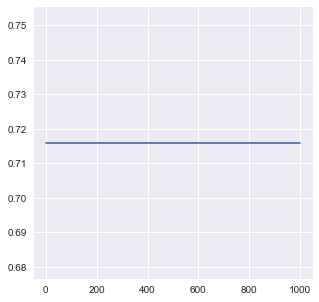

In [95]:
#### Thresh hold optimisation for pruning
results = []
threshold_options = [2,10, 20, 50, 100, 200, 500, 1000]

for thresh in threshold_options:
    prune_index(Decision_Tree_Tuned.tree_, 0, thresh)
    print(thresh, 'Threshold' )
    pred_train = Decision_Tree_Tuned.predict(X_train)
    roc_train = roc_auc_score(y_train, pred_train)
    Dec_Tune_Pred = Decision_Tree_Tuned.predict(X_test)
    roc_test = roc_auc_score(y_test, Dec_Tune_Pred)
    print ('C-stat(Train): ', roc_train,'C-stat(Test): ', roc_test)
    results.append(roc)
    print ('')
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)   
pd.Series(results, threshold_options).plot();

In [629]:
y_test.shape

(3903,)

In [1397]:
pred_train = Decision_Tree_Tuned.predict(X_train)
roc_auc_score(y_train, pred_train )

0.6218378768304484

In [112]:
pred_dc = Decision_Tree_Tuned.predict(X_test)
roc_auc_score(y_test, pred_pruned)

0.620207009617956

In [99]:
confusion_matrix(y_test, pred_pruned)

array([[1370,  737],
       [ 736, 1060]])

In [1400]:
features = X_train.columns

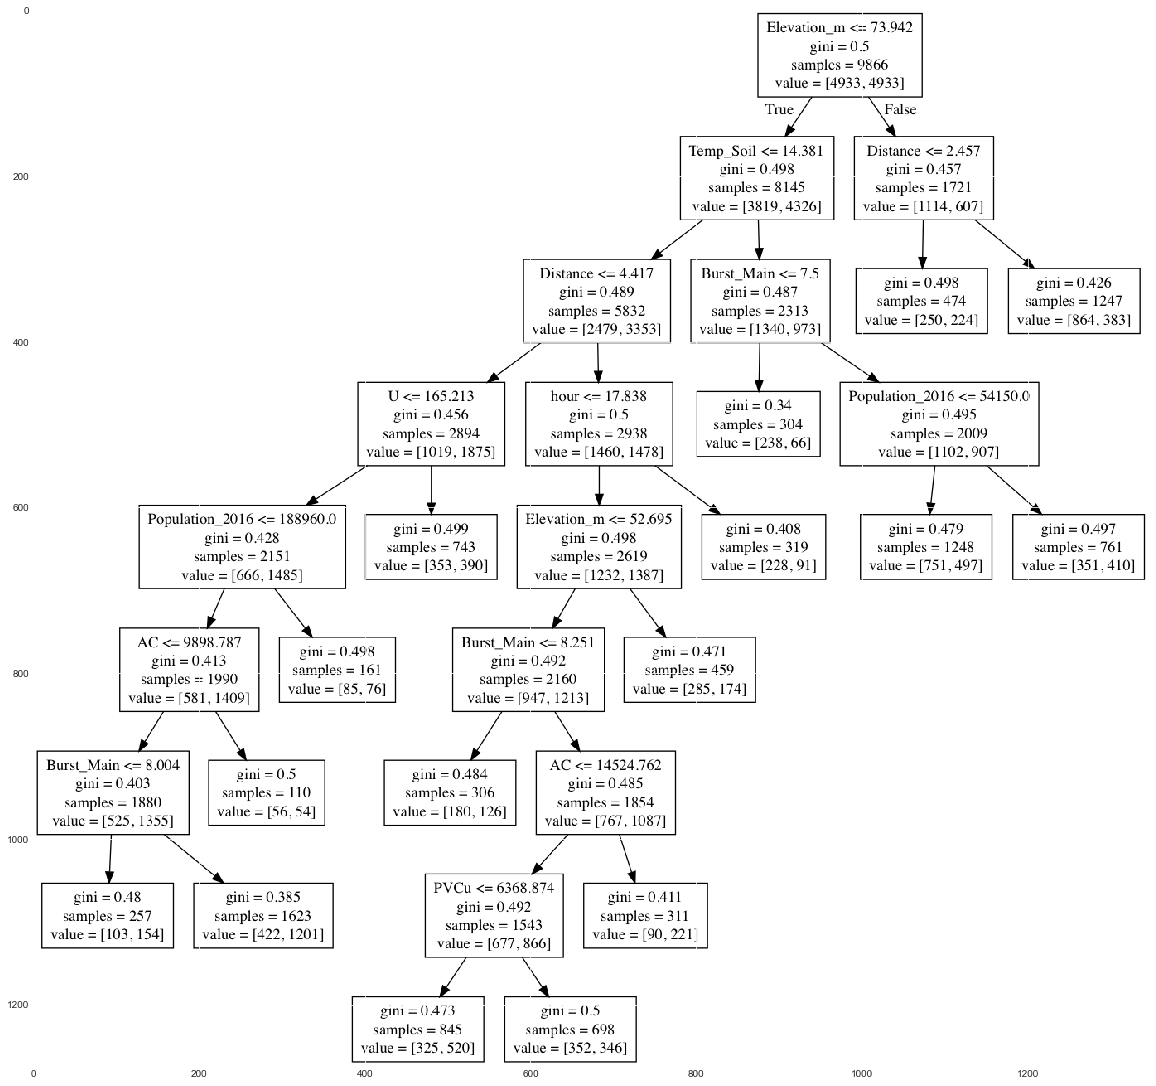

In [1401]:
show_tree(Decision_Tree_Tuned, features, 'D_tree_Tune_APP_Taste.png')

In [819]:
X_smote.shape

(9866, 20)

# GB Trees

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
gbc = GradientBoostingClassifier(n_estimators=500,max_features=5, max_depth=10,random_state=42)
GB_tree= gbc.fit(X_smote, y_smote)

In [36]:
Gradient_model.score(X_test, y_test)

NameError: name 'Gradient_model' is not defined

In [1359]:
Gradient_model.score(X_test, y_test)

0.7130412503202664

In [37]:
pred_GB= GB_tree.predict(X_test)
roc_auc_score(y_test, pred_GB)

0.7112805654711255

In [775]:
auc_rf_f1

0.7990789002191233

In [38]:
y_prob_GB = GB_tree.predict_proba(X_test)[::,1]
fpr_GB, tpr_GB, _ = roc_curve(y_test, y_prob_GB)
auc_GB = roc_auc_score(y_test, y_prob_GB)
auc_GB

0.7970959036745687

In [1331]:
X_smote = pd.DataFrame(X_smote, columns=X_train.columns)

30 trees
C-stat:  0.6361721930187106

50 trees
C-stat:  0.6449657943666408

100 trees
C-stat:  0.653517995482235

200 trees
C-stat:  0.6650092807620794

500 trees
C-stat:  0.691656193217433



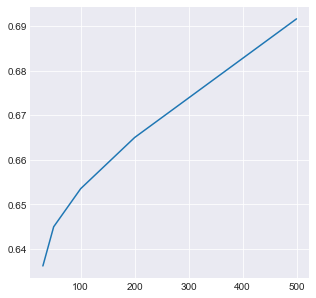

In [1355]:
#### Number of tree 
results = []
n_estimator_options = [30, 50, 100, 200, 500]

for trees in n_estimator_options:
    model = GradientBoostingClassifier(n_estimators=trees, random_state=42)
    model.fit(X_smote, y_smote)
    print(trees, 'trees' )
    pred = model.predict(X_test)
    roc = roc_auc_score(y_test, pred)
    print ('C-stat: ', roc)
    results.append(roc)
    print ('')
fig, ax1 = plt.subplots()    
fig.set_size_inches(5,5)   
pd.Series(results, n_estimator_options).plot();

1 features
C-stat:  0.619240351654206

2 features
C-stat:  0.6695499041798313

5 features
C-stat:  0.6989992791025355

10 features
C-stat:  0.7037001753620078

20 features
C-stat:  0.6765057190846504



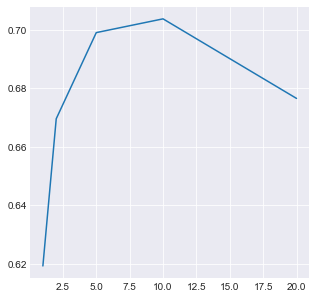

In [1356]:
#### Max_depth in each tree
results = []
max_depth_options = [1, 2, 5, 10]

for max_depth in max_depth_options:
    model = GradientBoostingClassifier(n_estimators=500,random_state=42, 
                              max_depth= max_depth )
    model.fit(X_smote, y_smote)
    print (max_depth, 'features')
    pred = model.predict(X_test)
    roc = roc_auc_score(y_test, pred) 
    print ('C-stat: ', roc)
    results.append(roc)
    print ("")
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)
pd.Series(results, max_depth_options).plot();


1 features
C-stat:  0.7088345878570002

2 features
C-stat:  0.7104227820511329

5 features
C-stat:  0.7127136398662641

10 features
C-stat:  0.7097016203280402

20 features
C-stat:  0.7037001753620078



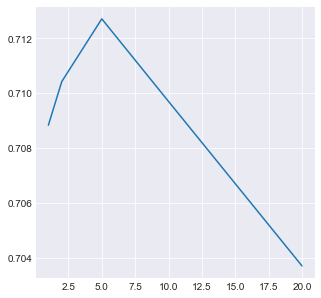

In [1357]:
results = []
max_feature_options = [1, 2, 5, 10, 20]

for max_feature in max_feature_options:
    model = GradientBoostingClassifier(n_estimators=500,random_state=42, 
                              max_depth= 10, max_features = max_feature )
    model.fit(X_smote, y_smote)
    print (max_feature, 'features')
    pred = model.predict(X_test)
    roc = roc_auc_score(y_test, pred) 
    print ('C-stat: ', roc)
    results.append(roc)
    print ("")
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)
pd.Series(results, max_feature_options).plot();


In [1377]:
X_smote.shape

(9866, 52)

0.1 sample
C-stat:  0.6871607580205128

0.2 sample
C-stat:  0.7000080863132014

0.5 sample
C-stat:  0.712330464894302

0.7 sample
C-stat:  0.7127506360704534

1 sample
C-stat:  0.5



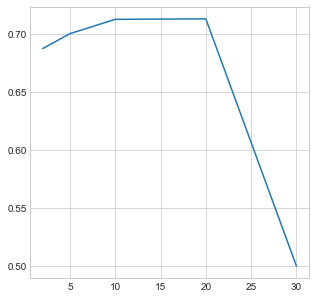

In [1351]:
results = []
max_sample_options = [0.1, 0.2, 0.5, 0.7]

for max_sample in max_sample_options:
    model = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200, n_jobs=-1, random_state=42, 
                              max_features= 5, max_samples = max_sample )
    model.fit(X_smote, y_smote)
    print (max_sample, 'sample')
    pred = model.predict(X_test)
    roc = roc_auc_score(y_test, pred) 
    print ('C-stat: ', roc)
    results.append(roc)
    print ("")
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)
pd.Series(results, max_depth_options).plot();

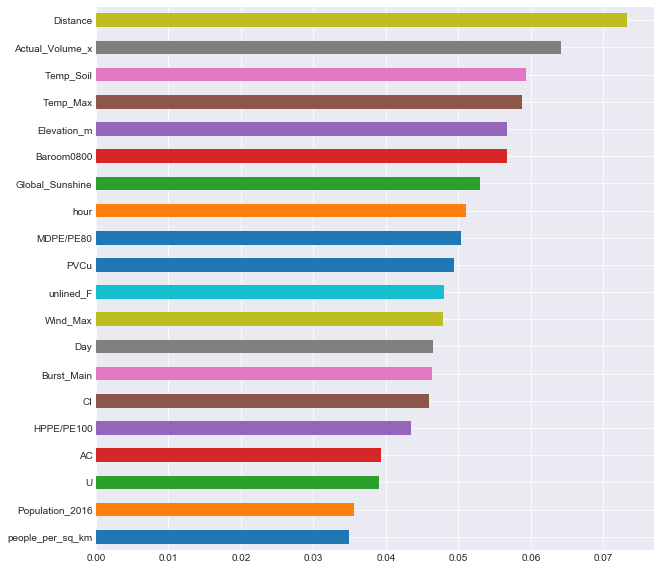

In [1464]:
Gradient_importance = pd.Series(Gradient_model.feature_importances_, index = X_train.columns)
Gradient_importance = Gradient_importance.sort_values()
Gradient_importance.plot(kind = 'barh', figsize = (10,10));

# ROC Curve

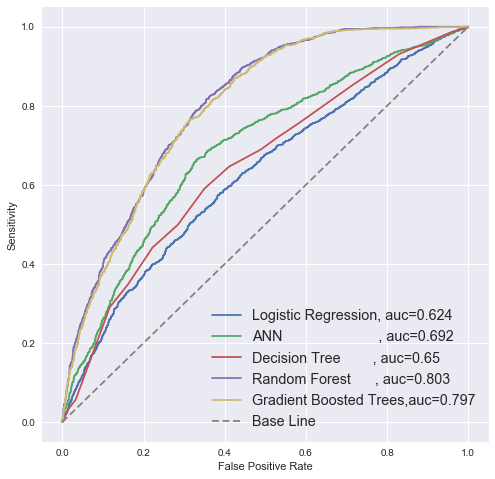

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
baseline_y = np.repeat(0.392, 11, axis=0)
baseline = np.arange(0,1.1, 0.1)
### Logistic Regression
y_prob_logi = lg.predict_proba(X_test_scaled)[::,1]
fpr_logi, tpr_logi, _ = roc_curve(y_test, y_prob_logi)
auc_logi = roc_auc_score(y_test, y_prob_logi)
### ANN
y_prob_ann = clf_ann.predict_proba(X_test_scaled)[::,1]
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_prob_ann)
auc_ann = roc_auc_score(y_test, y_prob_ann)
### Decision Tree
y_prob_dc = Decision_Tree_Tuned.predict_proba(X_test)[::,1]
fpr_dc, tpr_dc, _ = roc_curve(y_test, y_prob_dc)
auc_dc = roc_auc_score(y_test, y_prob_dc)
### Randome Forest
y_prob_rf = rf_app_taste_oversampling.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
### Gradient Boosted Trees
y_prob_GB = GB_tree.predict_proba(X_test)[::,1]
fpr_GB, tpr_GB, _ = roc_curve(y_test, y_prob_GB)
auc_GB = roc_auc_score(y_test, y_prob_GB)
###plot ROC Curve
plt.plot(fpr_logi, tpr_logi, label = 'Logistic Regression, auc=' +str(np.round(auc_logi,3)));
plt.plot(fpr_ann, tpr_ann, label =   'ANN                        , auc=' + str(np.round(auc_ann,3)));
plt.plot(fpr_dc, tpr_dc, label =     'Decision Tree        , auc=' + str(np.round(auc_dc,3)));
plt.plot(fpr_rf, tpr_rf, label =     'Random Forest      , auc=' + str(np.round(auc_rf,3)));
plt.plot(fpr_GB, tpr_GB, label =     'Gradient Boosted Trees,auc=' + str(np.round(auc_GB,3)));
plt.plot(baseline, baseline, label = 'Base Line',dashes =(4,2), color='grey');
plt.xlabel('False Positive Rate')
plt.ylabel('Sensitivity')
plt.legend(loc=4, fontsize = 'large')
plt.show()

In [154]:
accuracy_score(y_test, pred_ann)

0.6633358954650269

In [368]:
print(classification_report(y_test, pred_normal))

             precision    recall  f1-score   support

          0       0.72      0.76      0.74      2107
          1       0.70      0.65      0.67      1796

avg / total       0.71      0.71      0.71      3903



In [366]:
print(classification_report(y_test, pred_oversampling))

             precision    recall  f1-score   support

          0       0.75      0.73      0.74      2107
          1       0.69      0.71      0.70      1796

avg / total       0.72      0.72      0.72      3903



In [1563]:
pred_oversampling = rf_app_taste_oversampling.predict(X_test)

In [1656]:
accuracy_score(y_test, pred_GB)

0.7145785293364079

In [1565]:
confusion_matrix(y_test, pred_oversampling)

array([[1531,  576],
       [ 526, 1270]])

In [1516]:
confusion_matrix(y_test, pred_rf)

array([[1552,  555],
       [ 517, 1279]])

In [1517]:
accuracy_score(y_test, pred_rf)

0.7253394824493979

In [1907]:
app_taste.City[app_taste.High_Low == 'High_Area']

28       LEIGHTON BUZZARD
29          MILTON KEYNES
31          MILTON KEYNES
32               GRANTHAM
45       BURY ST. EDMUNDS
67                 CROMER
71          MILTON KEYNES
92                BEDFORD
103             TOWCESTER
113      LEIGHTON BUZZARD
114               LINCOLN
125             BRAINTREE
126      BURY ST. EDMUNDS
128            SHERINGHAM
135         MILTON KEYNES
137         MILTON KEYNES
138           NORTHAMPTON
140             KETTERING
142            COLCHESTER
144              GRANTHAM
145               LINCOLN
150               NORWICH
159             KETTERING
162               BEDFORD
178             BRAINTREE
179               DEREHAM
188            BUCKINGHAM
190           NORTHAMPTON
192         MILTON KEYNES
207      BURY ST. EDMUNDS
               ...       
28791             IPSWICH
28819                DISS
28825           HAVERHILL
28847         NORTHAMPTON
28854         NORTHAMPTON
28866           NEWMARKET
28867             LINCOLN
28870       

In [104]:
feature_importance_index = X_train.columns

# Variable Importance Comparison (bar charts)

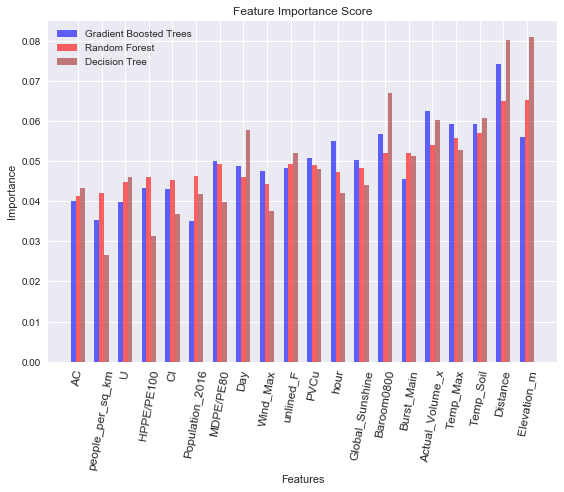

In [157]:
fig, ax = plt.subplots()
fig.set_size_inches(8,7)
n_groups = 20
bar_width = 0.2
opacity = 0.6
index = np.arange(n_groups)
rects1 = plt.bar(index,GB_tree.feature_importances_, bar_width, 
                  alpha = opacity, color= 'b', label = 'Gradient Boosted Trees')

rects2 = plt.bar(index+ bar_width, rf_app_taste_oversampling.feature_importances_, bar_width
                 , alpha = opacity, color= 'r', label = 'Random Forest')

rects3 = plt.bar(index + bar_width + bar_width,Decision_Tree_Tuned.feature_importances_, bar_width,
                  alpha = opacity, color = 'brown', label = 'Decision Tree')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Score')
plt.xticks(index + bar_width, feature_importance_index, rotation = 80, fontsize = 'medium')
plt.legend()

plt.tight_layout()
plt.show() 

# Stressing test

In [106]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step


In [1667]:
testing.reset_index(inplace=False)
del testing['index']
testing.head()

KeyError: 'index'

In [161]:
trying = testing.reset_index()

In [162]:
trying.drop('index', axis=1, inplace=True)

In [192]:
app_taste['MDPE/PE80'].describe()

count    13008.000000
mean      7074.986343
std       7452.951807
min          0.000000
25%       1988.812500
50%       4633.316000
75%       9562.199000
max      66700.558000
Name: MDPE/PE80, dtype: float64

In [240]:
app_taste.PVCu.describe()

count    13008.000000
mean      5667.716551
std       5796.663344
min          0.000000
25%       1064.869000
50%       3745.996500
75%       8727.480000
max      26956.716000
Name: PVCu, dtype: float64

In [246]:
instance1.PVCu.describe()

count      272.000000
mean     13550.000000
std       7866.384176
min          0.000000
25%       6775.000000
50%      13550.000000
75%      20325.000000
max      27100.000000
Name: PVCu, dtype: float64

In [749]:
instance1 = trying[trying.index ==301 ] ###1
instance2 = trying[trying.index == 2081]#### 0
instance3 = trying[trying.index == 105 ]###1
instance4 = trying[trying.index == 4]####0
instance5 = trying[trying.index == 1776]###0

instance6 = trying[trying.index == 787]
instance7 = trying [trying.index == 1378]
instance8 = trying[trying.index ==1408]
instance9 = trying[trying.index ==600]
instance10 = trying[trying.index ==2670]

In [750]:
instance1 = instance1.values
instance1 = np.repeat(instance1, 272, axis=0)
instance1 = pd.DataFrame(instance1, columns=X_test.columns)
synthetic1 =[]
for i in frange(0, 28000, 100):
    synthetic1.append(i)
synthetic1 = pd.Series(synthetic1) 
instance1.PVCu= synthetic1

ValueError: Empty data passed with indices specified.

In [751]:
instance2 = instance2.values
instance2 = np.repeat(instance2, 272, axis=0)
instance2 = pd.DataFrame(instance2, columns=X_test.columns)
synthetic2 =[]
for i in frange(0, 28000, 100):
    synthetic2.append(i)
synthetic2 = pd.Series(synthetic2) 
instance2.PVCu = synthetic2

ValueError: Empty data passed with indices specified.

In [262]:
instance3 = instance3.values
instance3 = np.repeat(instance3, 272, axis=0)
instance3 = pd.DataFrame(instance3, columns=X_test.columns)
synthetic3 =[]
for i in frange(0, 28000, 100):
    synthetic3.append(i)
synthetic3 = pd.Series(synthetic3) 
instance3.PVCu = synthetic3

In [263]:
instance4 = instance4.values
instance4 = np.repeat(instance4, 272, axis=0)
instance4 = pd.DataFrame(instance4, columns=X_test.columns)
synthetic4 =[]
for i in frange(0, 28000, 100):
    synthetic4.append(i)
synthetic4 = pd.Series(synthetic4) 
instance4.PVCu = synthetic4

In [264]:
instance5 = instance5.values
instance5 = np.repeat(instance5, 272, axis=0)
instance5 = pd.DataFrame(instance5, columns=X_test.columns)
synthetic5 =[]
for i in frange(0, 28000, 100):
    synthetic5.append(i)
synthetic5 = pd.Series(synthetic5) 
instance5.PVCu = synthetic5

In [265]:
instance6 = instance6.values
instance6 = np.repeat(instance6, 272, axis=0)
instance6 = pd.DataFrame(instance6, columns=X_test.columns)
synthetic6 =[]
for i in frange(0, 28000, 100):
    synthetic6.append(i)
synthetic6 = pd.Series(synthetic6) 
instance6.PVCu= synthetic6

In [266]:
instance7 = instance7.values
instance7 = np.repeat(instance7, 272, axis=0)
instance7 = pd.DataFrame(instance7, columns=X_test.columns)
synthetic7 =[]
for i in frange(0, 28000, 100):
    synthetic7.append(i)
synthetic7 = pd.Series(synthetic7) 
instance7.PVCu = synthetic7

In [267]:
instance8 = instance8.values
instance8 = np.repeat(instance8, 272, axis=0)
instance8 = pd.DataFrame(instance8, columns=X_test.columns)
synthetic8 =[]
for i in frange(0, 28000, 100):
    synthetic8.append(i)
synthetic8 = pd.Series(synthetic8) 
instance8.PVCu = synthetic8

In [268]:
instance9 = instance9.values
instance9 = np.repeat(instance9, 272, axis=0)
instance9 = pd.DataFrame(instance9, columns=X_test.columns)
synthetic9 =[]
for i in frange(0, 28000, 100):
    synthetic9.append(i)
synthetic9 = pd.Series(synthetic9) 
instance9.PVCu = synthetic9

In [269]:
instance10 = instance10.values
instance10 = np.repeat(instance10, 272, axis=0)
instance10 = pd.DataFrame(instance10, columns=X_test.columns)
synthetic10 =[]
for i in frange(0, 69000, 100):
    synthetic10.append(i)
synthetic10 = pd.Series(synthetic10) 
instance10.PVCu = synthetic10

In [270]:
instance1_prob = rf_app_taste_oversampling.predict_proba(instance1)
instance1_prob = pd.DataFrame(instance1_prob, index = instance1.PVCu)
instance2_prob = rf_app_taste_oversampling.predict_proba(instance2)
instance2_prob = pd.DataFrame(instance2_prob, index = instance2.PVCu)
instance3_prob = rf_app_taste_oversampling.predict_proba(instance3)
instance3_prob = pd.DataFrame(instance3_prob, index = instance3.PVCu)
instance4_prob = rf_app_taste_oversampling.predict_proba(instance4)
instance4_prob = pd.DataFrame(instance4_prob, index = instance4.PVCu)
instance5_prob = rf_app_taste_oversampling.predict_proba(instance5)
instance5_prob = pd.DataFrame(instance5_prob, index = instance5.PVCu)
instance6_prob = rf_app_taste_oversampling.predict_proba(instance6)
instance6_prob = pd.DataFrame(instance6_prob, index = instance6.PVCu)
instance7_prob = rf_app_taste_oversampling.predict_proba(instance7)
instance7_prob = pd.DataFrame(instance7_prob, index = instance7.PVCu)
instance8_prob = rf_app_taste_oversampling.predict_proba(instance8)
instance8_prob = pd.DataFrame(instance8_prob, index = instance8.PVCu)
instance9_prob = rf_app_taste_oversampling.predict_proba(instance9)
instance9_prob = pd.DataFrame(instance9_prob, index = instance9.PVCu)
instance10_prob = rf_app_taste_oversampling.predict_proba(instance10)
instance10_prob = pd.DataFrame(instance10_prob, index = instance10.PVCu)

Text(0.5,1,'Stress testing on the length of PVCu')

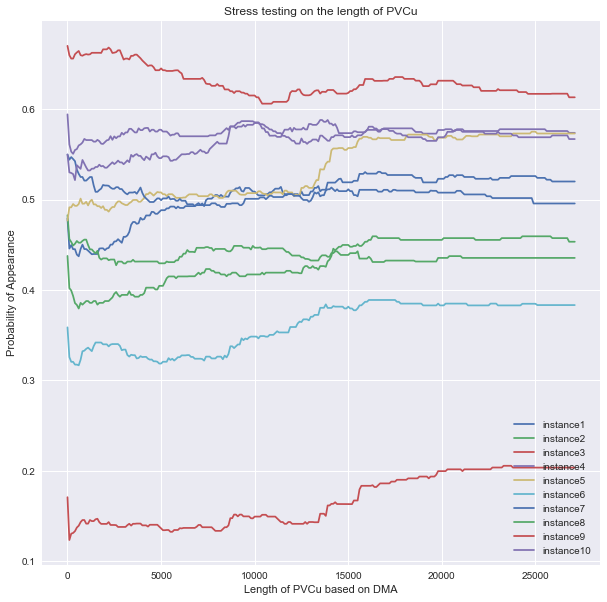

In [272]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,10)
instance1_prob[0].plot(ax=ax1, x = instance1_prob.index, label='instance1' );
instance2_prob[0].plot(ax=ax1, x = instance2_prob.index, label='instance2');
instance3_prob[0].plot(ax=ax1, x = instance3_prob.index, label='instance3');
instance4_prob[0].plot(ax=ax1, x = instance4_prob.index, label='instance4');
instance5_prob[0].plot(ax=ax1, x = instance5_prob.index, label='instance5');
instance6_prob[0].plot(ax=ax1, x = instance6_prob.index, label='instance6');
instance7_prob[0].plot(ax=ax1, x = instance7_prob.index, label='instance7');
instance8_prob[0].plot(ax=ax1, x = instance8_prob.index, label='instance8');
instance9_prob[0].plot(ax=ax1, x = instance9_prob.index, label='instance9');
instance10_prob[0].plot(ax=ax1, x = instance10_prob.index, label='instance10');
plt.xlabel('Length of PVCu based on DMA')
plt.ylabel('Probability of Appearance')
plt.legend(loc=4)
plt.title('Stress testing on the length of PVCu')


In [1981]:
water.Work_Type[water.DMASHORTNA == 'IPSRR1MA'].value_counts()

Discolouration    54
White Water       18
Hardness          16
TCP               13
Chlorine          10
Particles          8
Lead               6
Earthy             4
Illness            4
General            4
Taste              3
Campaigns          2
Other              1
Report request     1
Pets               1
Irritation         1
Name: Work_Type, dtype: int64

In [1984]:
app_taste = pd.concat([water.DMASHORTNA, app_taste], axis=1, join='inner')
app_taste.head()

,DMASHORTNA,Actual_Volume_x,Work_Type,City,Burst_Main,Temp_Max,Temp_Min,Wind_Max,RainFall,Evapo,...,ST,U,unlined_F,cluster,Distance,Area_sq_km,Population_2016,people_per_sq_km,Elevation_m,Target_merge
0,SORES1MA,1009.017,White Water,PETERBOROUGH,8,10.4,4.9,45.0,22.9,0.13,...,0.000,204.189,43.565693,1,17.721157,44.0,175722.0,3976.0,26,0
7,HENEAGMA,1022.131,Earthy,GRIMSBY,19,9.7,5.6,28.0,7.2,0.46,...,0.000,0.000,81.603424,1,0.575411,24.0,133534.0,5564.0,5,1
9,STUTTOMA,1022.131,TCP,IPSWICH,19,9.7,5.6,28.0,7.2,0.46,...,0.000,10707.574,7.648211,1,8.143093,49.0,181949.0,3713.0,31,1
10,GARLANMA,1022.131,Chlorine,FELIXSTOWE,19,9.7,5.6,28.0,7.2,0.46,...,0.000,0.000,0.408093,1,0.838218,12.0,29464.0,2455.0,0,1
18,SWISBXMA,1022.131,White Water,WISBECH,19,9.7,5.6,28.0,7.2,0.46,...,84.963,3116.272,46.638710,0,0.808633,13.0,34910.0,2685.0,3,0


# Hotspot for Taste

In [2031]:
hotspot_taste =['BIGGWLMA', 'COLCSTMA' ,'COLCHWMA', 'MARTH2MA' ,'COLMSIMA' ,'COLCLDMA' ,'IPSRR1MA' ,'CLAPLAMA'  ,'HOLBEAMA' ,'STOTFLMA','BRIANAMA'    
'FRAME2MA']
DMASHORTNA = pd.Series(hotspot_taste)

In [22]:
hotspot_taste = app_taste.loc[(app_taste.DMASHORTNA == 'BIGGWLMA')| (app_taste.DMASHORTNA == 'COLCHWMA')|
              (app_taste.DMASHORTNA == 'COLCSTMA')|(app_taste.DMASHORTNA == 'MARTH2MA')|
              (app_taste.DMASHORTNA == 'COLMSIMA')|(app_taste.DMASHORTNA == 'COLCLDMA')|
              (app_taste.DMASHORTNA == 'IPSRR1MA')| (app_taste.DMASHORTNA == 'CLAPLAMA')|
              (app_taste.DMASHORTNA == 'HOLBEAMA')|(app_taste.DMASHORTNA== 'STOTFLMA')|
              (app_taste.DMASHORTNA == 'BRIANAMA')|(app_taste.DMASHORTNA =='FRAME2MA')|
            (app_taste.DMASHORTNA == 'MATTERMA' )|(app_taste.DMASHORTNA == 'COLCTCMA' )|
            (app_taste.DMASHORTNA == 'NWALS2MA')|(app_taste.DMASHORTNA == 'COLCNTMA')|
            (app_taste.DMASHORTNA == 'GUNTH1MA')|(app_taste.DMASHORTNA == 'ARLESDMA')|
            (app_taste.DMASHORTNA == 'FELIRDMA')|(app_taste.DMASHORTNA == 'NHYKEVMA')|
            (app_taste.DMASHORTNA == 'COLBTRMA')                 ,:]


In [21]:
DMA_col = water.DMASHORTNA
app_taste = pd.concat([app_taste, DMA_col], axis=1, join='inner')

In [170]:
new = hotspot_taste.DMASHORTNA

In [171]:
hotspot_taste = pd.concat([new, water], axis=1, join='inner' )
hotspot_taste.shape

(774, 95)

In [90]:
list_hot_taste = hotspot_taste.loc[:, ('City', 'DMASHORTNA')]

In [91]:
list_hot_taste.drop_duplicates('DMASHORTNA', keep='first', inplace=True)
list_hot_taste.to_csv('list of taste hotspot.csv')

In [24]:
app_taste.DMASHORTNA[app_taste.Target_merge ==1].value_counts()

BIGGWLMA    44
COLCSTMA    37
COLCHWMA    33
COLCLDMA    28
MARTH2MA    28
COLMSIMA    28
IPSRR1MA    27
CLAPLAMA    26
BRIANAMA    25
HOLBEAMA    25
STOTFLMA    25
MATTERMA    24
COLCTCMA    24
NWALS2MA    24
MABLENMA    24
FRAME2MA    24
COLCNTMA    22
WATTO7MA    22
LBUCKBMA    21
GUNTH1MA    21
FELIRDMA    21
ARLESDMA    21
COLBTRMA    20
NHYKEVMA    20
LANGFDMA    19
SUDCLLMA    18
GAINHIMA    18
BRAHTPMA    18
WATTO6MA    18
HARLS1MA    18
            ..
EDENHAMA     1
DESBWTMA     1
LITBRKMA     1
BASSINMA     1
SORMSBMA     1
BRADENMA     1
GAWCOTMA     1
BUCKPGMA     1
ADELDRMA     1
BOUGHTMA     1
PINWESMA     1
NORW08MA     1
COLLYWMA     1
BECKCOMA     1
HORST3MA     1
OLDWARMA     1
ALLINGMA     1
FOXCOTMA     1
SKIPPRMA     1
MANTNLMA     1
CLIFVLMA     1
BRKPRVMA     1
HABIN1MA     1
SCAWBRMA     1
GRTVILMA     1
NEWBALMA     1
SIBBTVMA     1
CRICKDMA     1
THORNYMA     1
BARHAVMA     1
Name: DMASHORTNA, Length: 1290, dtype: int64

In [2217]:
app_taste.Target_merge[app_taste.DMASHORTNA == 'COLBTRMA'].value_counts()

1    20
0    11
Name: Target_merge, dtype: int64

In [21]:
app_freq_DM = hotspot_appearance.DMASHORTNA.unique()
len(app_freq_DM)

NameError: name 'hotspot_appearance' is not defined

In [540]:
taste_freq_DM = hotspot_taste.DMASHORTNA.unique()

In [541]:
taste_freq_DM

array(['BRIANAMA', 'COLCSTMA', 'IPSRR1MA', 'FRAME2MA', 'ARLESDMA',
       'BIGGWLMA', 'STOTFLMA', 'COLCTCMA', 'HOLBEAMA', 'COLCLDMA',
       'MARTH2MA', 'COLCNTMA', 'NWALS2MA', 'COLCHWMA', 'COLMSIMA',
       'GUNTH1MA', 'FELIRDMA', 'COLBTRMA', 'CLAPLAMA', 'NHYKEVMA',
       'MATTERMA'], dtype=object)

In [429]:
app_taste['Taste_DMA'] =app_taste.DMASHORTNA.isin(taste_freq_DM)
app_taste.head()

,Actual_Volume_x,Work_Type,City,Burst_Main,Temp_Max,Temp_Min,Wind_Max,RainFall,Evapo,UV_Max,...,unlined_F,cluster,Distance,Area_sq_km,Population_2016,people_per_sq_km,Elevation_m,Target_merge,DMASHORTNA,Taste_DMA
0,1009.017,White Water,PETERBOROUGH,8,10.4,4.9,45.0,22.9,0.13,0.0,...,43.565693,1,17.721157,44.0,175722.0,3976.0,26,0,SORES1MA,False
7,1022.131,Earthy,GRIMSBY,19,9.7,5.6,28.0,7.2,0.46,0.5,...,81.603424,1,0.575411,24.0,133534.0,5564.0,5,1,HENEAGMA,False
9,1022.131,TCP,IPSWICH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,7.648211,1,8.143093,49.0,181949.0,3713.0,31,1,STUTTOMA,False
10,1022.131,Chlorine,FELIXSTOWE,19,9.7,5.6,28.0,7.2,0.46,0.5,...,0.408093,1,0.838218,12.0,29464.0,2455.0,0,1,GARLANMA,False
18,1022.131,White Water,WISBECH,19,9.7,5.6,28.0,7.2,0.46,0.5,...,46.638710,0,0.808633,13.0,34910.0,2685.0,3,0,SWISBXMA,False


In [431]:
app_taste.Taste_DMA = [1 if i == True else 0 for i in app_taste.Taste_DMA]

In [432]:
app_taste.Taste_DMA.value_counts()

0    12234
1      774
Name: Taste_DMA, dtype: int64

In [538]:
app_DM.describe()

count    1336.000000
mean        5.269461
std         6.960832
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       102.000000
Name: DMASHORTNA, dtype: float64

In [551]:
app_taste.Target_merge[(app_taste.unlined_F >=20)&(app_taste.unlined_F <=34)].value_counts()

0    997
1    976
Name: Target_merge, dtype: int64

In [537]:
app_DM = app_taste.DMASHORTNA[app_taste.Target_merge==0].value_counts()

In [450]:
taste_DM = app_taste.DMASHORTNA[app_taste.Target_merge==1].value_counts() #### Threshold 20

Text(0.5,1,'Density plot')

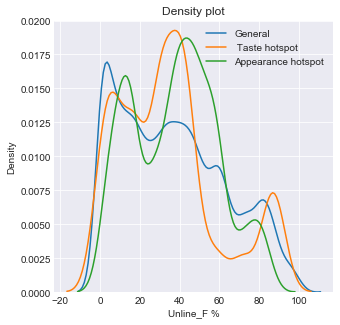

In [2242]:
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)
plt.ylim(0, 0.02)
sns.kdeplot(water.unlined_F, label = 'General');
sns.kdeplot(hotspot_taste.unlined_F, label = ' Taste hotspot');
sns.kdeplot(hotspot_appearance.unlined_F, label = 'Appearance hotspot');
plt.xlabel('Unline_F %')
plt.ylabel('Density')
plt.legend(loc=1)
plt.title('Density plot')

In [566]:
len(hotspot_taste.Elevation_m)

774

Text(0.5,1,'Density plot')

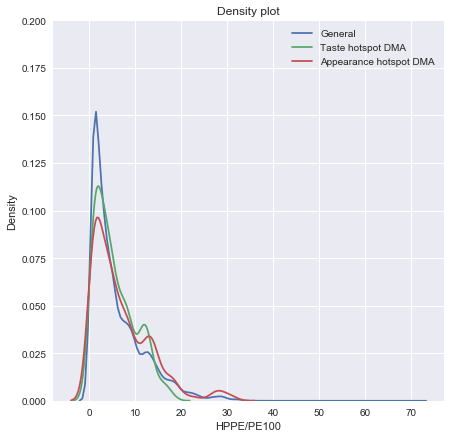

In [810]:
fig, ax1 = plt.subplots()
fig.set_size_inches(7,7)
plt.ylim(0, 0.2)
sns.kdeplot(water.Distance, label = 'General');
sns.kdeplot(hotspot_taste.Distance, label = 'Taste hotspot DMA');
sns.kdeplot(hotspot_appearance.Distance, label = 'Appearance hotspot DMA');

plt.xlabel('HPPE/PE100')
plt.ylabel('Density')
plt.legend(loc=1)
plt.title('Density plot')

In [799]:
app_taste.Population_2016

0        175722.0
7        133534.0
9        181949.0
10        29464.0
18        34910.0
20        11000.0
21        46278.0
26       133813.0
27       195971.0
28        41725.0
29       242679.0
31       242679.0
32        46056.0
43        39107.0
44         3615.0
45        43489.0
50        12374.0
53       181949.0
56        48472.0
59        33023.0
60        25629.0
61        25629.0
62        25629.0
63        25629.0
64        25629.0
65        25629.0
67         7704.0
68        34613.0
69        20112.0
70       133534.0
           ...   
28971      9495.0
28972      9495.0
28973     25629.0
28974    113378.0
28975     14077.0
28976     14077.0
28977      9495.0
28978     26492.0
28979      5276.0
28981    229854.0
28982    242679.0
28984    195971.0
28985    181949.0
28989     62499.0
28990    133813.0
28991     18814.0
28992    195971.0
28997     65166.0
28998     27498.0
29002      5081.0
29003      5081.0
29004     11000.0
29009     25629.0
29010     43489.0
29011     

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


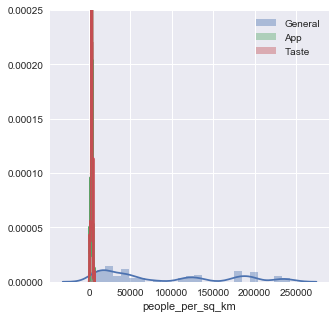

In [808]:
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)
plt.ylim(0, 0.00025)
sns.distplot(water.Population_2016, label= 'General');
sns.distplot(app_taste.people_per_sq_km[app_taste.Target_merge==0], label = 'App');
sns.distplot(app_taste.people_per_sq_km[app_taste.Target_merge==1], label = 'Taste');
plt.legend(loc=1)

Text(0.5,1,'Density plot')

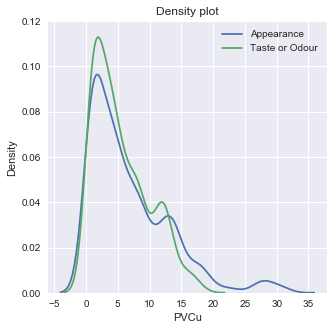

In [769]:
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)
plt.ylim(0, 0.12)
sns.kdeplot(hotspot_appearance.Distance ,label = 'Appearance');
sns.kdeplot(hotspot_taste.Distance,label = 'Taste or Odour');
plt.xlabel('PVCu')
plt.ylabel('Density')
plt.legend(loc=1)
plt.title('Density plot')

Text(0.5,1,'Density plot')

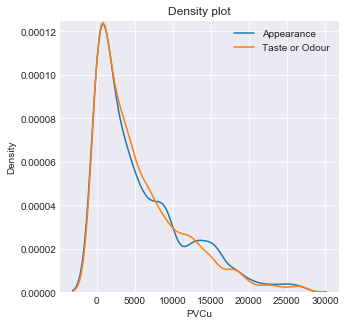

In [30]:
sns.set_style('darkgrid')
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)
plt.ylim(0, 0.000125)
sns.kdeplot(app_taste['PVCu'][app_taste.Target_merge==0] ,label = 'Appearance');
sns.kdeplot(app_taste['PVCu'][app_taste.Target_merge==1] ,label = 'Taste or Odour');
plt.xlabel('PVCu')
plt.ylabel('Density')
plt.legend(loc=1)
plt.title('Density plot')

In [701]:
app_taste.Elevation_m[app_taste.DMASHORTNA == 'BRANH1MA'].unique()

array([36, 33,  6, 11])

# Appearance Hotspot

In [24]:
hotspot_appearance = app_taste.loc[(app_taste.DMASHORTNA == 'BRANH1MA')| (app_taste.DMASHORTNA == 'WATTO6MA')|
              (app_taste.DMASHORTNA == 'DERSINMA')|(app_taste.DMASHORTNA == 'DENFR1MA')|
              (app_taste.DMASHORTNA == 'MABLENMA')|(app_taste.DMASHORTNA == 'SUTTONMA')|
              (app_taste.DMASHORTNA == 'POTTONMA')| (app_taste.DMASHORTNA == 'LBUCKBMA')|
              (app_taste.DMASHORTNA == 'SAWTRYMA')|(app_taste.DMASHORTNA== 'AYLME2MA')|
              (app_taste.DMASHORTNA == 'WATTO7MA')|(app_taste.DMASHORTNA =='STRUM3MA')|
            (app_taste.DMASHORTNA == 'WHUNSBMA' )|(app_taste.DMASHORTNA == 'COLNE3MA' )|
            (app_taste.DMASHORTNA == 'GLEMEAMA')|(app_taste.DMASHORTNA == 'LODDO3MA')|
            (app_taste.DMASHORTNA == 'LAMSEYMA')|(app_taste.DMASHORTNA == 'TOWNCRMA')|
            (app_taste.DMASHORTNA == 'MILHOWMA')|(app_taste.DMASHORTNA == 'LITTWNMA')|
            (app_taste.DMASHORTNA == 'THORPNMA')|(app_taste.DMASHORTNA == 'STANF1MA')|
            (app_taste.DMASHORTNA == 'LANGFDMA')| (app_taste.DMASHORTNA == 'BLISWRMA')|
            (app_taste.DMASHORTNA == 'MABLESMA')|(app_taste.DMASHORTNA == 'KINGHWMA')|
             (app_taste.DMASHORTNA == 'HADDENMA')|(app_taste.DMASHORTNA == 'FARBLTMA')|
            (app_taste.DMASHORTNA == 'RUSH09MA')|(app_taste.DMASHORTNA == 'WOSANDMA')|
             (app_taste.DMASHORTNA == 'SUDHKDMA')|(app_taste.DMASHORTNA == 'RUBRR1MA')|
             (app_taste.DMASHORTNA == 'NORW22MA')|(app_taste.DMASHORTNA == 'AYLME7MA')|
            (app_taste.DMASHORTNA == 'BLBULLMA')|(app_taste.DMASHORTNA == 'DEREH2MA')|
            (app_taste.DMASHORTNA == 'BRABOOMA')|(app_taste.DMASHORTNA == 'AYLME4MA')|
            (app_taste.DMASHORTNA == 'IRTHP1MA')|(app_taste.DMASHORTNA == 'THPRW2MA')|
            (app_taste.DMASHORTNA == 'MOUSWTMA')|(app_taste.DMASHORTNA == 'SCOPWIMA')|
            (app_taste.DMASHORTNA == 'GLEMWEMA')|(app_taste.DMASHORTNA == 'STRARDMA')|
             (app_taste.DMASHORTNA == 'BARNACMA')|(app_taste.DMASHORTNA == 'WATTO5MA')|
             (app_taste.DMASHORTNA == 'IPSRA2MA')|(app_taste.DMASHORTNA == 'WASHEIMA')|
             (app_taste.DMASHORTNA == 'RISBYDMA')|(app_taste.DMASHORTNA == 'NORTTKMA')|
             (app_taste.DMASHORTNA == 'LOUTHNMA')|(app_taste.DMASHORTNA == 'WDFRD1MA')|
             (app_taste.DMASHORTNA == 'STANF4MA' )|(app_taste.DMASHORTNA == 'KENNI5MA'),:]

In [2200]:
app_hotspot_list = app_taste.DMASHORTNA[app_taste.Target_merge==0].value_counts()
app_hotspot_list[app_hotspot_list>=20]

BRANH1MA    102
WATTO6MA     58
DERSINMA     54
DENFR1MA     47
MABLENMA     45
SUTTONMA     38
POTTONMA     36
COLCSTMA     36
LBUCKBMA     34
SAWTRYMA     33
SWAFF4MA     33
AYLME2MA     33
WATTO7MA     32
STRUM3MA     30
WHUNSBMA     30
COLNE3MA     30
GLEMEAMA     30
LODDO3MA     30
LAMSEYMA     30
TOWNCRMA     29
MILHOWMA     29
LITTWNMA     28
COLCLDMA     28
THORPNMA     28
STANF1MA     28
LANGFDMA     27
BLISWRMA     27
MABLESMA     27
IPSRR1MA     26
KINGHWMA     26
           ... 
RUSH09MA     26
WOSANDMA     26
SUDHKDMA     25
RUBRR1MA     25
NORW22MA     25
AYLME7MA     25
BLBULLMA     25
DEREH2MA     25
BRABOOMA     24
AYLME4MA     24
IRTHP1MA     24
THPRW2MA     24
MOUSWTMA     23
SCOPWIMA     23
GLEMWEMA     22
STRARDMA     22
BARNACMA     22
WATTO5MA     22
IPSRA2MA     21
WASHEIMA     21
RISBYDMA     21
NORTTKMA     21
LOUTHNMA     21
POTTERMA     20
LOUTHSMA     20
MORTBTMA     20
WDFRD1MA     20
STKPRKMA     20
STANF4MA     20
KENNI5MA     20
Name: DMASHORTNA, Length

In [86]:
hotspot_csv = hotspot_appearance.loc[:, ('City', 'DMASHORTNA' )]


In [88]:
hotspot_csv.drop_duplicates('DMASHORTNA', keep='first', inplace=True)

In [89]:

hotspot_csv.to_csv('list_hotspot_appearance.csv')

In [25]:
app_taste.City[app_taste.DMASHORTNA=='WYMONDHAM'].value_counts()

Series([], Name: City, dtype: int64)

In [85]:
app_taste.DMASHORTNA[app_taste.Target_merge==0].value_counts()

BRANH1MA    102
WATTO6MA     58
DERSINMA     54
DENFR1MA     47
MABLENMA     45
SUTTONMA     38
POTTONMA     36
COLCSTMA     36
LBUCKBMA     34
AYLME2MA     33
SAWTRYMA     33
SWAFF4MA     33
WATTO7MA     32
GLEMEAMA     30
LODDO3MA     30
STRUM3MA     30
COLNE3MA     30
LAMSEYMA     30
WHUNSBMA     30
MILHOWMA     29
TOWNCRMA     29
STANF1MA     28
COLCLDMA     28
THORPNMA     28
LITTWNMA     28
BLISWRMA     27
LANGFDMA     27
MABLESMA     27
IPSRR1MA     26
WOSANDMA     26
           ... 
RYHALLMA      1
FINSHDMA      1
RUSROUMA      1
NEWRDNMA      1
SWINESMA      1
FISKERMA      1
GTCASTMA      1
IXTHELMA      1
WORSLEMA      1
SWANPLMA      1
NORW12MA      1
WINDHLMA      1
CLAXBYMA      1
SCUNTHMA      1
SOTHLNMA      1
MERSRDMA      1
BASSINMA      1
DALEVEMA      1
HAWSTEMA      1
SUDHSTMA      1
NHYKEVMA      1
NORPETMA      1
AVONWYMA      1
WICKE1MA      1
BUXCHKMA      1
HARDLNMA      1
SIXHDSMA      1
LILLOVMA      1
REDBOUMA      1
BRIGINMA      1
Name: DMASHORTNA, Length

In [705]:
app_taste.City[app_taste.DMASHORTNA == 'DERSINMA'].value_counts()

KING'S LYNN    61
Name: City, dtype: int64

In [691]:
dishot = Discolouration.DMASHORTNA[Discolouration.Target_merge==1].value_counts()

In [299]:
dishot = dishot.index[dishot>20]

AttributeError: 'Index' object has no attribute 'index'

In [302]:
dishot = ('STJCOLMA', 'IPSST2MA', 'SHELDRMA', 'STKPRKMA', 'IPSRA2MA', 'BRAMRDMA',
       'IPSW03MA', 'DEREH2MA', 'BIGGWLMA', 'POTTONMA', 'WHERRDMA',
       'OSBOURMA', 'ALGAKIMA', 'BRAKVFMA', 'BRABCSMA', 'BARWDVMA', 'BOSLEAMA',
       'DISSS1MA', 'BRSSCLMA', 'HADLRDMA', 'SHEFFDMA', 'DEREH1MA', 'MANTHOMA',
       'LNGBENMA', 'STOTFLMA', 'MONKSRMA', 'IPSRR7MA', 'RUSH09MA', 'HOLBEAMA',
       'ARLESDMA', 'BOPRIOMA', 'SAXSTOMA', 'RUSH07MA', 'LANGFDMA', 'BLETLKMA',
       'CONINGMA', 'LONSUTMA', 'ARLSWBMA', 'IPSW04MA', 'OLNEY1MA', 'WOLLT1MA',
       'RUBRR1MA', 'BOWHITMA', 'HOLMARMA', 'CRANWEMA')

In [304]:
hotspot_dis = Discolouration.loc[Discolouration.DMASHORTNA.isin(dishot)]

In [29]:
app_taste.Temp_Soil.describe()

count    13008.000000
mean        10.024233
std          5.648557
min         -3.300000
25%          5.286108
50%         10.100000
75%         14.900000
max         24.600000
Name: Temp_Soil, dtype: float64

In [661]:
lat_app_ele = app_taste.lat_x[(app_taste.Target_merge ==0)&(app_taste.Elevation_m>=50)].values
long_app_ele = app_taste.long[(app_taste.Target_merge ==0)&(app_taste.Elevation_m>=50)].values

# Heatmap Visualisation

In [32]:
import gmplot
from IPython.display import display
 


In [35]:
lat_taste = hotspot_taste.lat_x.values
long_taste = hotspot_taste.long.values
gmap = gmplot.GoogleMapPlotter(52.454018999999995,0.13057022, 5 )
gmap.heatmap(lat_taste, long_taste, threshold=10, radius=15)
gmap.draw('Taste_Hotspot.html')

In [30]:
lat_appearance = hotspot_appearance.lat_x.values
long_appearance = hotspot_appearance.long.values

In [1953]:
lat1 = app_taste.lat_x[(app_taste.High_Low== 'High_Area')].values
long1= app_taste.long[(app_taste.High_Low == 'High_Area')].values 
lat2 = app_taste.lat_x[(app_taste.High_Low == 'Low_Area')].values
long2= app_taste.long[(app_taste.High_Low == 'Low_Area')].values 

In [1999]:
lat_far = app_taste.lat_x[(app_taste.Long_Distance== 'Far_Centre')].values
long_far = app_taste.long[(app_taste.Long_Distance== 'Far_Centre')].values
lat_close= app_taste.lat_x[(app_taste.Long_Distance== 'Close_Centre')].values
long_close= app_taste.long[(app_taste.Long_Distance== 'Close_Centre')].values

In [2384]:
lat_PVCu = app_taste.lat_x[(app_taste.PVCu >54)&(app_taste.PVCu <330)].values
long_PVCu = app_taste.long[(app_taste.PVCu >54)&(app_taste.PVCu <330)].values

In [36]:
gmap = gmplot.GoogleMapPlotter(52.454018999999995,0.13057022, 10 )
gmap.heatmap(lat_appearance, long_appearance, threshold=10, radius=15)
gmap.draw('Appearance_hotspot.html')

In [51]:
gmap = gmplot.GoogleMapPlotter(52.454018999999995,0.13057022, 10 )
gmap.scatter(lat_appearance, long_appearance, color = 'red', size =350, marker = False)
gmap.draw('Appearance_scatter.html')


In [1966]:
gmap = gmplot.GoogleMapPlotter(52.454018999999995,0.13057022, 10 )
gmap.scatter(lat1, long1, color= 'blue', size=350, marker = False);#### High
gmap.scatter(lat2, long2, color= 'red', size=350, marker=False);###  Low
gmap.draw('High_Low.html')

In [1967]:
gmap = gmplot.GoogleMapPlotter(52.454018999999995,0.13057022, 10 )
gmap.scatter(lat_app, long_app, color= 'blue', size=350, marker = False);#### app
gmap.scatter(lat_taste, long_taste, color= 'red', size=350, marker=False);###  taste
gmap.draw('app_vs_taste.html')

In [662]:
gmap = gmplot.GoogleMapPlotter(52.454018999999995,0.13057022, 10 )
gmap.scatter(lat_app_ele, long_app_ele, color= 'red', size=350, marker = False);#### app
gmap.draw('APP over 50.html')

In [2003]:
gmap = gmplot.GoogleMapPlotter(52.454018999999995,0.13057022, 10 )
gmap.scatter(lat_far, long_far, color= 'blue', size=350, marker = False);#### app
gmap.scatter(lat_close, long_close, color= 'red', size=350, marker=False);###  taste
gmap.scatter(lat_app, long_app, color= 'yellow', size=350, marker = False);#### app
gmap.draw('short vs long.html')

# Visualisation of Hotspot

In [2216]:
gmap = gmplot.GoogleMapPlotter(52.454018999999995,0.13057022, 10 )
gmap.scatter(lat_appearance, long_appearance, color= 'blue', size=350, marker = False);#### app
gmap.scatter(lat_taste, long_taste, color= 'red', size=350, marker=False);###  taste
gmap.draw('apperance_hotspot vs taste_hotspot.html')

In [59]:
pd.concat(g for _, g in water.groupby("Distance") if len(g) > 2)

,Ref,Raised_Date,Raised_Time,Work_Category,Work_Type,City,District,DMASHORTNA,lat_x,long,...,Area_sq_km,Population_2016,people_per_sq_km,Elevation_m,lat,lng,Rolling (365 Day),Rolling (7 Day),Actual_Rolling,Distance
6557,286849048,03/11/2014,12:20:00,Info Only,TCP,HOLT,NaN,SHERI5MA,52.909359,1.086747,...,2.0,3988.0,2417.0,62,52.909359,1.086747,1078.749,1048.421,-9.788,0.000000
6558,286849048,03/11/2014,12:20:00,Info Only,TCP,HOLT,NaN,SHERI5MA,52.909359,1.086747,...,2.0,3988.0,2417.0,62,52.909359,1.086747,1078.749,1048.421,-9.788,0.000000
7029,388089167,21/11/2014,13:39:00,Water Quality,Particles,ATTLEBOROUGH,Old Buckenham,OBUCK1MA,52.518064,1.015527,...,3.0,11344.0,3781.0,41,52.518064,1.015527,1078.628,1052.915,11.868,0.000000
7030,388089167,21/11/2014,13:39:00,Water Quality,Particles,ATTLEBOROUGH,Old Buckenham,OBUCK1MA,52.518064,1.015527,...,3.0,11344.0,3781.0,41,52.518064,1.015527,1078.628,1052.915,11.868,0.000000
7036,722999884,22/11/2014,08:07:00,Water Quality,Lead,BRANDON,Lakenheath,LAKENHMA,52.446542,0.622533,...,3.0,9924.0,3308.0,11,52.446542,0.622533,1078.587,1052.498,-2.932,0.000000
7037,722999884,22/11/2014,08:07:00,Water Quality,Lead,BRANDON,Lakenheath,LAKENHMA,52.446542,0.622533,...,3.0,9924.0,3308.0,11,52.446542,0.622533,1078.587,1052.498,-2.932,0.000000
4052,278626633,12/07/2014,13:49:00,Info Only,White Water,SPILSBY,NaN,SPILSBMA,53.172703,0.093096,...,1.0,3615.0,3615.0,43,53.173630,0.093730,1087.250,1096.859,1.097,0.111408
6574,767068847,04/11/2014,13:55:00,Info Only,White Water,SPILSBY,NaN,SPILSBMA,53.172703,0.093096,...,1.0,3615.0,3615.0,43,53.173630,0.093730,1078.744,1047.685,-0.724,0.111408
6575,450627224,04/11/2014,08:24:00,Info Only,White Water,SPILSBY,NaN,SPILSBMA,53.172703,0.093096,...,1.0,3615.0,3615.0,43,53.173630,0.093730,1078.744,1047.685,-0.724,0.111408
6576,871447221,04/11/2014,10:21:00,Info Only,White Water,SPILSBY,NaN,SPILSBMA,53.172703,0.093096,...,1.0,3615.0,3615.0,43,53.173630,0.093730,1078.744,1047.685,-0.724,0.111408


In [61]:
hotspot_csv= hotspot_csv.loc[:,('lat_x','long')]

In [34]:
import os

import pandas as pd

from mapboxgl.utils import create_color_stops
from mapboxgl.viz import CircleViz


In [62]:
hotspot_csv.reset_index(inplace=True)

In [64]:
hotspot_csv.drop('index', axis=1, inplace=True)

In [36]:
token = os.getenv('pk.eyJ1Ijoic3VuZ2ppbmNob2kiLCJhIjoiY2plbzRkbGJlMDBrODJ4cXg2YXNyMnJwbSJ9.hiuz2jnvXjFKUG5V1NgmQg')

In [71]:
def df_to_geojson(df, properties, lat='lat', lon='long', z='elev'):
    geojson = {'type':'FeatureCollection', 'features':[]}
    for _, row in df.iterrows():
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point','coordinates':[]}}
        feature['geometry']['coordinates'] = [row[lon],row[lat],row[z]]
        for prop in properties:
            feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)
    return geojson


In [65]:
import pandas as pd
import geojson

def data2geojson(df):
    features = []
    insert_features = lambda X: features.append(
            geojson.Feature(geometry=geojson.Point((X["long"],
                                                    X["lat"],
                                                    X["elev"])),
                            properties=dict(name=X["name"],
                                            description=X["description"])))
    df.apply(insert_features, axis=1)
    with open('map1.geojson', 'w', encoding='utf8') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True, ensure_ascii=False)

In [28]:
app_taste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13008 entries, 0 to 29032
Data columns (total 66 columns):
Actual_Volume_x     13008 non-null float64
Work_Type           13008 non-null object
City                13008 non-null object
Burst_Main          13008 non-null int64
Temp_Max            13008 non-null float64
Temp_Min            13008 non-null float64
Wind_Max            13008 non-null float64
RainFall            13008 non-null float64
Evapo               13008 non-null float64
UV_Max              13008 non-null float64
Solar_Energy        13008 non-null float64
Global_Sunshine     13008 non-null float64
Temp0800            13008 non-null float64
Baroom0800          13008 non-null float64
Temp_Soil           13008 non-null float64
hour                13008 non-null int64
day_of_week         13008 non-null int64
Month               13008 non-null int64
Quater              13008 non-null int64
Day                 13008 non-null int64
Weekend             13008 non-null int64
Chlo